# Importation

In [2]:
# Lecture des fichiers csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import warnings
import statsmodels
import time
import scipy.stats as st
import statsmodels.formula.api
import statsmodels.api
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing, cluster, metrics, decomposition
from seaborn import pairplot, heatmap
from sklearn.decomposition import PCA
from sklearn import decomposition, preprocessing

In [4]:
#On charge seaborn
sns.set()

In [5]:
dispoAlim_2017=pd.read_csv("DAN-P9-data/DisponibiliteAlimentaire_2017.csv")
population_2000_2018=pd.read_csv("DAN-P9-data/Population_2000_2018.csv")
stabilite_politique=pd.read_csv("DAN-P9-data/stabilitepolitique.csv")
pib=pd.read_csv("DAN-P9-data/pib.csv")
croissanceeconomique=pd.read_csv("DAN-P9-data/croissance_economique.csv")

# Cleaning des données

# Disponibilité alimentaire

In [6]:
dispoAlim_2017

Code Domaine                      Domaine  Code zone         Zone  \
0               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
...             ...                          ...        ...          ...   
176595          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176596          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176597          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176598          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176599          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   

        Code Élément                                            Élément  \
0               5511                                         Production   
1               5611                            Importations - Quantité   
2               5072                                 Variation de stock   
3               5911                            Exportations - Quantité   
4               5301                           Disponibilité intérieure   
...              ...                                                ...   
176595          5142                                         Nourriture   
176596           645  Disponibilité alimentaire en quantité (kg/pers...   
176597           664     Disponibilité alimentaire (Kcal/personne/jour)   
176598           674  Disponibilité de protéines en quantité (g/pers...   
176599           684  Disponibilité de matière grasse en quantité (g...   

        Code Produit          Produit  Code année  Année               Unité  \
0               2511  Blé et produits        2017   2017  Milliers de tonnes   
1               2511  Blé et produits        2017   2017  Milliers de tonnes   
2               2511  Blé et produits        2017   2017  Milliers de tonnes   
3               2511  Blé et produits        2017   2017  Milliers de tonnes   
4               2511  Blé et produits        2017   2017  Milliers de tonnes   
...              ...              ...         ...    ...                 ...   
176595          2899     Miscellanees        2017   2017  Milliers de tonnes   
176596          2899     Miscellanees        2017   2017                  kg   
176597          2899     Miscellanees        2017   2017  Kcal/personne/jour   
176598          2899     Miscellanees        2017   2017     g/personne/jour   
176599          2899     Miscellanees        2017   2017     g/personne/jour   

         Valeur Symbole Description du Symbole  
0       4281.00       S  Données standardisées  
1       2302.00       S  Données standardisées  
2       -119.00       S  Données standardisées  
3          0.00       S  Données standardisées  
4       6701.00       S  Données standardisées  
...         ...     ...                    ...  
176595    19.00       S  Données standardisées  
176596     1.33      Fc        Donnée calculée  
176597     1.00      Fc        Donnée calculée  
176598     0.04      Fc        Donnée calculée  
176599     0.02      Fc        Donnée calculée  

[176600 rows x 14 columns]

In [7]:
dispoAlim_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [8]:
#Liste des elements
list(dispoAlim_2017.Élément.unique())

['Production',
 'Importations - Quantité',
 'Variation de stock',
 'Exportations - Quantité',
 'Disponibilité intérieure',
 'Aliments pour animaux',
 'Semences',
 'Pertes',
 'Résidus',
 'Nourriture',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Traitement',
 'Autres utilisations (non alimentaire)',
 'Alimentation pour touristes']

In [9]:
#Liste des produits
list(dispoAlim_2017.Produit.unique())


['Blé et produits',
 'Riz et produits',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Avoine',
 'Millet et produits',
 'Sorgho et produits',
 'Céréales, Autres',
 'Pommes de Terre et produits',
 'Ignames',
 'Racines nda',
 'Sucre, canne',
 'Sucre, betterave',
 'Sucre Eq Brut',
 'Edulcorants Autres',
 'Miel',
 'Haricots',
 'Pois',
 'Légumineuses Autres et produits',
 'Noix et produits',
 'Soja',
 'Arachides Decortiquees',
 'Graines de tournesol',
 'Graines Colza/Moutarde',
 'Graines de coton',
 'Coco (Incl Coprah)',
 'Sésame',
 'Olives',
 'Plantes Oleiferes, Autre',
 'Huile de Soja',
 "Huile d'Arachide",
 'Huile de Tournesol',
 'Huile de Colza&Moutarde',
 'Huile Graines de Coton',
 'Huile de Palmistes',
 'Huile de Palme',
 'Huile de Coco',
 'Huile de Sésame',
 "Huile d'Olive",
 'Huile de Son de Riz',
 'Huile de Germe de Maïs',
 'Huil Plantes Oleif Autr',
 'Tomates et produits',
 'Oignons',
 'Légumes, Autres',
 'Oranges, Mandarines',
 'Citrons & Limes et produits',
 

In [10]:
#Sélection des produits correspondant 
dispoAlim_2017_vol=dispoAlim_2017[dispoAlim_2017['Produit'].isin(['Viande de Volailles', 'Poissons Marins, Autres','Viande, Autre'])]

In [11]:
#Transformer les lignes produits en colonnes et les remplir avec leur dispo interieur
#Sélection des produits correspondant 
dispoAlim_1 = pd.DataFrame(dispoAlim_2017_vol)
dispoAlim_1['Poisson'] = dispoAlim_1[dispoAlim_1['Produit'] == 'Poissons Marins, Autres']['Valeur']
dispoAlim_1['Volaille'] = dispoAlim_1[dispoAlim_1['Produit'] == 'Viande de Volailles']['Valeur']
dispoAlim_1['Viande'] = dispoAlim_1[dispoAlim_1['Produit'] == 'Viande, Autre']['Valeur']
dispoAlim_1=dispoAlim_1.loc[dispoAlim_1.Élément=="Disponibilité intérieure"]
dispoAlim_1

Code Domaine                      Domaine  Code zone            Zone  \
654             FBS  Nouveaux Bilans Alimentaire          2     Afghanistan   
665             FBS  Nouveaux Bilans Alimentaire          2     Afghanistan   
1708            FBS  Nouveaux Bilans Alimentaire        202  Afrique du Sud   
1721            FBS  Nouveaux Bilans Alimentaire        202  Afrique du Sud   
1866            FBS  Nouveaux Bilans Alimentaire        202  Afrique du Sud   
...             ...                          ...        ...             ...   
175378          FBS  Nouveaux Bilans Alimentaire        251          Zambie   
175505          FBS  Nouveaux Bilans Alimentaire        251          Zambie   
176391          FBS  Nouveaux Bilans Alimentaire        181        Zimbabwe   
176405          FBS  Nouveaux Bilans Alimentaire        181        Zimbabwe   
176531          FBS  Nouveaux Bilans Alimentaire        181        Zimbabwe   

        Code Élément                   Élément  Code Produit  \
654             5301  Disponibilité intérieure          2734   
665             5301  Disponibilité intérieure          2735   
1708            5301  Disponibilité intérieure          2734   
1721            5301  Disponibilité intérieure          2735   
1866            5301  Disponibilité intérieure          2764   
...              ...                       ...           ...   
175378          5301  Disponibilité intérieure          2735   
175505          5301  Disponibilité intérieure          2764   
176391          5301  Disponibilité intérieure          2734   
176405          5301  Disponibilité intérieure          2735   
176531          5301  Disponibilité intérieure          2764   

                        Produit  Code année  Année               Unité  \
654         Viande de Volailles        2017   2017  Milliers de tonnes   
665               Viande, Autre        2017   2017  Milliers de tonnes   
1708        Viande de Volailles        2017   2017  Milliers de tonnes   
1721              Viande, Autre        2017   2017  Milliers de tonnes   
1866    Poissons Marins, Autres        2017   2017  Milliers de tonnes   
...                         ...         ...    ...                 ...   
175378            Viande, Autre        2017   2017  Milliers de tonnes   
175505  Poissons Marins, Autres        2017   2017  Milliers de tonnes   
176391      Viande de Volailles        2017   2017  Milliers de tonnes   
176405            Viande, Autre        2017   2017  Milliers de tonnes   
176531  Poissons Marins, Autres        2017   2017  Milliers de tonnes   

        Valeur Symbole Description du Symbole  Poisson  Volaille  Viande  
654       57.0       S  Données standardisées      NaN      57.0     NaN  
665       12.0       S  Données standardisées      NaN       NaN    12.0  
1708    2118.0       S  Données standardisées      NaN    2118.0     NaN  
1721      36.0       S  Données standardisées      NaN       NaN    36.0  
1866       4.0       S  Données standardisées      4.0       NaN     NaN  
...        ...     ...                    ...      ...       ...     ...  
175378    40.0       S  Données standardisées      NaN       NaN    40.0  
175505     1.0       S  Données standardisées      1.0       NaN     NaN  
176391    76.0       S  Données standardisées      NaN      76.0     NaN  
176405    37.0       S  Données standardisées      NaN       NaN    37.0  
176531     1.0       S  Données standardisées      1.0       NaN     NaN  

[512 rows x 17 columns]

In [12]:
#Pivoter la table pour avoir les infos en fonction de la zone
dispovol=dispoAlim_2017_vol.pivot_table(index='Zone', columns='Élément', values='Valeur', aggfunc=sum)
dispovol

Élément                Alimentation pour touristes  Aliments pour animaux  \
Zone                                                                        
Afghanistan                                    NaN                    NaN   
Afrique du Sud                                 0.0                    1.0   
Albanie                                        NaN                    NaN   
Algérie                                        0.0                    NaN   
Allemagne                                      NaN                    NaN   
...                                            ...                    ...   
Émirats arabes unis                            NaN                    NaN   
Équateur                                       0.0                    0.0   
États-Unis d'Amérique                          NaN                   21.0   
Éthiopie                                       0.0                    NaN   
Îles Salomon                                   0.0                    NaN   

Élément                Autres utilisations (non alimentaire)  \
Zone                                                           
Afghanistan                                              NaN   
Afrique du Sud                                           0.0   
Albanie                                                  0.0   
Algérie                                                  0.0   
Allemagne                                                0.0   
...                                                      ...   
Émirats arabes unis                                     30.0   
Équateur                                                 0.0   
États-Unis d'Amérique                                   89.0   
Éthiopie                                                 0.0   
Îles Salomon                                             0.0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                       6.0   
Afrique du Sud                                                  145.0   
Albanie                                                          87.0   
Algérie                                                          24.0   
Allemagne                                                        78.0   
...                                                               ...   
Émirats arabes unis                                             166.0   
Équateur                                                         83.0   
États-Unis d'Amérique                                           221.0   
Éthiopie                                                          4.0   
Îles Salomon                                                     37.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.83        
Afrique du Sud                                                     36.44        
Albanie                                                            17.27        
Algérie                                                             7.05        
Allemagne                                                          21.96        
...                                                                  ...        
Émirats arabes unis                                                48.49        
Équateur                                                           19.43        
États-Unis d'Amérique                                              56.51        
Éthiopie                                                            1.22        
Îles Salomon                                                       14.91        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone                                                                     

In [13]:
#Calcul matrice de correlation 
dataframe = pd.DataFrame(dispovol, columns=['Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Résidus','Semences','Traitement','Variation de stock'])
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')


In [14]:
dispovol=dispovol.reset_index()
dispovol

Élément                   Zone  Alimentation pour touristes  \
0                  Afghanistan                          NaN   
1               Afrique du Sud                          0.0   
2                      Albanie                          NaN   
3                      Algérie                          0.0   
4                    Allemagne                          NaN   
..                         ...                          ...   
169        Émirats arabes unis                          NaN   
170                   Équateur                          0.0   
171      États-Unis d'Amérique                          NaN   
172                   Éthiopie                          0.0   
173               Îles Salomon                          0.0   

Élément  Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                          NaN                                    NaN   
1                          1.0                                    0.0   
2                          NaN                                    0.0   
3                          NaN                                    0.0   
4                          NaN                                    0.0   
..                         ...                                    ...   
169                        NaN                                   30.0   
170                        0.0                                    0.0   
171                       21.0                                   89.0   
172                        NaN                                    0.0   
173                        NaN                                    0.0   

Élément  Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                   6.0   
1                                                 145.0   
2                                                  87.0   
3                                                  24.0   
4                                                  78.0   
..                                                  ...   
169                                               166.0   
170                                                83.0   
171                                               221.0   
172                                                 4.0   
173                                                37.0   

Élément  Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                     1.83        
1                                                    36.44        
2                                                    17.27        
3                                                     7.05        
4                                                    21.96        
..                                                     ...        
169                                                  48.49        
170                                                  19.43        
171                                                  56.51        
172                                                   1.22        
173                                                  14.91        

Élément  Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                     0.38               
1                                                     9.32               
2                                                     6.50               
3                                                     1.60               
4                                                     4.33               
..                                                     ...               
169                                                  10.45               
170                                                   6.36               
171                                                  14.91               
172                                                   0.20               
173                                   

In [15]:
#Concaténation des deux fichiers
dispovol= pd.merge(dispovol, dispoAlim_1, how="outer", on="Zone", indicator=True)
dispovol

Zone  Alimentation pour touristes  Aliments pour animaux  \
0       Afghanistan                          NaN                    NaN   
1       Afghanistan                          NaN                    NaN   
2    Afrique du Sud                          0.0                    1.0   
3    Afrique du Sud                          0.0                    1.0   
4    Afrique du Sud                          0.0                    1.0   
..              ...                          ...                    ...   
507        Éthiopie                          0.0                    NaN   
508        Éthiopie                          0.0                    NaN   
509    Îles Salomon                          0.0                    NaN   
510    Îles Salomon                          0.0                    NaN   
511    Îles Salomon                          0.0                    NaN   

     Autres utilisations (non alimentaire)  \
0                                      NaN   
1                                      NaN   
2                                      0.0   
3                                      0.0   
4                                      0.0   
..                                     ...   
507                                    0.0   
508                                    0.0   
509                                    0.0   
510                                    0.0   
511                                    0.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                               6.0   
1                                               6.0   
2                                             145.0   
3                                             145.0   
4                                             145.0   
..                                              ...   
507                                             4.0   
508                                             4.0   
509                                            37.0   
510                                            37.0   
511                                            37.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                 1.83        
1                                                 1.83        
2                                                36.44        
3                                                36.44        
4                                                36.44        
..                                                 ...        
507                                               1.22        
508                                               1.22        
509                                              14.91        
510                                              14.91        
511                                              14.91        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                 0.38               
1                                                 0.38               
2                                                 9.32               
3                                                 9.32               
4                                                 9.32               
..                                                 ...               
507                                               0.20               
508                                               0.20               
509                                               1.99               
510                                               1.99               
511                                               1.99               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.68          
1                                                 0.68          
2                                                14.47          
3                                         

In [16]:
#Correspondance à droite et vice versa
list(dispovol._merge.unique())

['both']

In [17]:
dispovol=dispovol[['Zone', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Production','Exportations - Quantité','Importations - Quantité','Poisson','Volaille','Viande']]
dispovol

Zone  Disponibilité de protéines en quantité (g/personne/jour)  \
0       Afghanistan                                               0.68          
1       Afghanistan                                               0.68          
2    Afrique du Sud                                              14.47          
3    Afrique du Sud                                              14.47          
4    Afrique du Sud                                              14.47          
..              ...                                                ...          
507        Éthiopie                                               0.54          
508        Éthiopie                                               0.54          
509    Îles Salomon                                               4.52          
510    Îles Salomon                                               4.52          
511    Îles Salomon                                               4.52          

     Production  Exportations - Quantité  Importations - Quantité  Poisson  \
0          40.0                      NaN                     29.0      NaN   
1          40.0                      NaN                     29.0      NaN   
2        1715.0                     74.0                    516.0      NaN   
3        1715.0                     74.0                    516.0      NaN   
4        1715.0                     74.0                    516.0      4.0   
..          ...                      ...                      ...      ...   
507       130.0                      0.0                      1.0      NaN   
508       130.0                      0.0                      1.0      0.0   
509        10.0                      4.0                      7.0      NaN   
510        10.0                      4.0                      7.0      NaN   
511        10.0                      4.0                      7.0      7.0   

     Volaille  Viande  
0        57.0     NaN  
1         NaN    12.0  
2      2118.0     NaN  
3         NaN    36.0  
4         NaN     NaN  
..        ...     ...  
507       NaN   116.0  
508       NaN     NaN  
509       3.0     NaN  
510       NaN     0.0  
511       NaN     NaN  

[512 rows x 8 columns]

In [18]:
#Convertir par an
dispovol['Disponibilité de protéines en quantité (g/personne/jour)']=dispovol['Disponibilité de protéines en quantité (g/personne/jour)'] * 365
#Renommer
dispovol=dispovol.rename(columns={'Disponibilité de protéines en quantité (g/personne/jour)':'Disponibilité de protéines en quantité (g/personne/an)'}) 

In [19]:
dispovol=dispovol.groupby(['Zone']).max().reset_index()

In [20]:
# Remplacer NAN par 0
dispovol.fillna(0, inplace=True) 

# Population

In [21]:
population_2000_2018.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

In [22]:
population_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [23]:
#Selection sur 2017
pop2017=population_2000_2018[population_2000_2018['Année']==2017]        
pop2017.head()

Code Domaine                       Domaine  Code zone            Zone  \
17           OA  Séries temporelles annuelles          2     Afghanistan   
36           OA  Séries temporelles annuelles        202  Afrique du Sud   
55           OA  Séries temporelles annuelles          3         Albanie   
74           OA  Séries temporelles annuelles          4         Algérie   
93           OA  Séries temporelles annuelles         79       Allemagne   

    Code Élément            Élément  Code Produit                 Produit  \
17           511  Population totale          3010  Population-Estimations   
36           511  Population totale          3010  Population-Estimations   
55           511  Population totale          3010  Population-Estimations   
74           511  Population totale          3010  Population-Estimations   
93           511  Population totale          3010  Population-Estimations   

    Code année  Année           Unité     Valeur Symbole  \
17        2017   2017  1000 personnes  36296.113       X   
36        2017   2017  1000 personnes  57009.756       X   
55        2017   2017  1000 personnes   2884.169       X   
74        2017   2017  1000 personnes  41389.189       X   
93        2017   2017  1000 personnes  82658.409       X   

           Description du Symbole Note  
17  Sources internationales sûres  NaN  
36  Sources internationales sûres  NaN  
55  Sources internationales sûres  NaN  
74  Sources internationales sûres  NaN  
93  Sources internationales sûres  NaN

In [24]:
#Somme des doublons de Zone
pop2017["Zone"].duplicated().sum()

0

In [25]:
#Rennomer valeur en population et mettre à la bonne échelle
pop2017=pop2017.rename(columns={'Valeur':'Population'}) 
pop2017['Population']=pop2017['Population'] * 1000
pop2017

Code Domaine                       Domaine  Code zone  \
17             OA  Séries temporelles annuelles          2   
36             OA  Séries temporelles annuelles        202   
55             OA  Séries temporelles annuelles          3   
74             OA  Séries temporelles annuelles          4   
93             OA  Séries temporelles annuelles         79   
...           ...                           ...        ...   
4333           OA  Séries temporelles annuelles        236   
4352           OA  Séries temporelles annuelles        237   
4371           OA  Séries temporelles annuelles        249   
4390           OA  Séries temporelles annuelles        251   
4409           OA  Séries temporelles annuelles        181   

                                        Zone  Code Élément            Élément  \
17                               Afghanistan           511  Population totale   
36                            Afrique du Sud           511  Population totale   
55                                   Albanie           511  Population totale   
74                                   Algérie           511  Population totale   
93                                 Allemagne           511  Population totale   
...                                      ...           ...                ...   
4333  Venezuela (République bolivarienne du)           511  Population totale   
4352                                Viet Nam           511  Population totale   
4371                                   Yémen           511  Population totale   
4390                                  Zambie           511  Population totale   
4409                                Zimbabwe           511  Population totale   

      Code Produit                 Produit  Code année  Année           Unité  \
17            3010  Population-Estimations        2017   2017  1000 personnes   
36            3010  Population-Estimations        2017   2017  1000 personnes   
55            3010  Population-Estimations        2017   2017  1000 personnes   
74            3010  Population-Estimations        2017   2017  1000 personnes   
93            3010  Population-Estimations        2017   2017  1000 personnes   
...            ...                     ...         ...    ...             ...   
4333          3010  Population-Estimations        2017   2017  1000 personnes   
4352          3010  Population-Estimations        2017   2017  1000 personnes   
4371          3010  Population-Estimations        2017   2017  1000 personnes   
4390          3010  Population-Estimations        2017   2017  1000 personnes   
4409          3010  Population-Estimations        2017   2017  1000 personnes   

      Population Symbole         Description du Symbole Note  
17    36296113.0       X  Sources internationales sûres  NaN  
36    57009756.0       X  Sources internationales sûres  NaN  
55     2884169.0       X  Sources internationales sûres  NaN  
74    41389189.0       X  Sources internationales sûres  NaN  
93    82658409.0       X  Sources internationales sûres  NaN  
...          ...     ...                            ...  ...  
4333  29402484.0       X  Sources internationales sûres  NaN  
4352  94600648.0       X  Sources internationales sûres  NaN  
4371  27834819.0       X  Sources internationales sûres  NaN  
4390  16853599.0       X  Sources internationales sûres  NaN  
4409  14236595.0       X  Sources internationales sûres  NaN  

[236 rows x 15 columns]

In [26]:
#Selection des colonnes à conserver
pop2017=pop2017[['Zone', 'Population']]
pop2017

Zone  Population
17                               Afghanistan  36296113.0
36                            Afrique du Sud  57009756.0
55                                   Albanie   2884169.0
74                                   Algérie  41389189.0
93                                 Allemagne  82658409.0
...                                      ...         ...
4333  Venezuela (République bolivarienne du)  29402484.0
4352                                Viet Nam  94600648.0
4371                                   Yémen  27834819.0
4390                                  Zambie  16853599.0
4409                                Zimbabwe  14236595.0

[236 rows x 2 columns]

In [27]:
#Somme des valeurs manquantes
pop2017["Zone"].isnull().sum(),pop2017["Population"].isnull().sum()

(0, 0)

# PIB

In [28]:
pib.head()

Code Domaine                             Domaine  Code zone         Zone  \
0           FS  Données de la sécurité alimentaire          2  Afghanistan   
1           FS  Données de la sécurité alimentaire          2  Afghanistan   
2           FS  Données de la sécurité alimentaire          2  Afghanistan   
3           FS  Données de la sécurité alimentaire          2  Afghanistan   
4           FS  Données de la sécurité alimentaire          2  Afghanistan   

   Code Élément Élément  Code Produit  \
0          6126  Valeur         22013   
1          6126  Valeur         22013   
2          6126  Valeur         22013   
3          6126  Valeur         22013   
4          6126  Valeur         22013   

                                             Produit  Code année  Année Unité  \
0  PIB par habitant, ($ PPA internationaux consta...        2012   2012    I$   
1  PIB par habitant, ($ PPA internationaux consta...        2013   2013    I$   
2  PIB par habitant, ($ PPA internationaux consta...        2014   2014    I$   
3  PIB par habitant, ($ PPA internationaux consta...        2015   2015    I$   
4  PIB par habitant, ($ PPA internationaux consta...        2016   2016    I$   

   Valeur Symbole             Description du Symbole  Note  
0  2075.5       X  Ciffre de sources internationales   NaN  
1  2116.5       X  Ciffre de sources internationales   NaN  
2  2102.4       X  Ciffre de sources internationales   NaN  
3  2068.3       X  Ciffre de sources internationales   NaN  
4  2057.1       X  Ciffre de sources internationales   NaN

In [29]:
#Selection sur 2017
pib=pib[pib['Année']==2017]        
pib.head()

Code Domaine                             Domaine  Code zone  \
5            FS  Données de la sécurité alimentaire          2   
15           FS  Données de la sécurité alimentaire        202   
26           FS  Données de la sécurité alimentaire          3   
37           FS  Données de la sécurité alimentaire          4   
48           FS  Données de la sécurité alimentaire         79   

              Zone  Code Élément Élément  Code Produit  \
5      Afghanistan          6126  Valeur         22013   
15  Afrique du Sud          6126  Valeur         22013   
26         Albanie          6126  Valeur         22013   
37         Algérie          6126  Valeur         22013   
48       Allemagne          6126  Valeur         22013   

                                              Produit  Code année  Année  \
5   PIB par habitant, ($ PPA internationaux consta...        2017   2017   
15  PIB par habitant, ($ PPA internationaux consta...        2017   2017   
26  PIB par habitant, ($ PPA internationaux consta...        2017   2017   
37  PIB par habitant, ($ PPA internationaux consta...        2017   2017   
48  PIB par habitant, ($ PPA internationaux consta...        2017   2017   

   Unité   Valeur Symbole             Description du Symbole  Note  
5     I$   2058.4       X  Ciffre de sources internationales   NaN  
15    I$  13860.3       X  Ciffre de sources internationales   NaN  
26    I$  12771.0       X  Ciffre de sources internationales   NaN  
37    I$  11737.4       X  Ciffre de sources internationales   NaN  
48    I$  53071.5       X  Ciffre de sources internationales   NaN

In [30]:
#Selection des colonnes à conserver
pib=pib[['Zone', 'Valeur']]
#Rennomer valeur en pib
pib=pib.rename(columns={'Valeur':'PIB/habitant'}) 

In [31]:
#Somme des doublons de Zone
pib["Zone"].duplicated().sum()

0

In [32]:
#Somme des valeurs manquantes
pib["Zone"].isnull().sum(),pib["PIB/habitant"].isnull().sum()

(0, 0)

# Stabilité politique

In [33]:
stabilite_politique.head()

Code Domaine                             Domaine  Code zone         Zone  \
0           FS  Données de la sécurité alimentaire          2  Afghanistan   
1           FS  Données de la sécurité alimentaire          2  Afghanistan   
2           FS  Données de la sécurité alimentaire          2  Afghanistan   
3           FS  Données de la sécurité alimentaire          2  Afghanistan   
4           FS  Données de la sécurité alimentaire          2  Afghanistan   

   Code Élément Élément  Code Produit  \
0          6125  Valeur         21032   
1          6125  Valeur         21032   
2          6125  Valeur         21032   
3          6125  Valeur         21032   
4          6125  Valeur         21032   

                                             Produit  Code année  Année  \
0  Stabilité politique et absence de violence/ter...        2000   2000   
1  Stabilité politique et absence de violence/ter...        2002   2002   
2  Stabilité politique et absence de violence/ter...        2003   2003   
3  Stabilité politique et absence de violence/ter...        2004   2004   
4  Stabilité politique et absence de violence/ter...        2005   2005   

    Unité  Valeur Symbole             Description du Symbole  Note  
0  indice   -2.44       X  Ciffre de sources internationales   NaN  
1  indice   -2.04       X  Ciffre de sources internationales   NaN  
2  indice   -2.20       X  Ciffre de sources internationales   NaN  
3  indice   -2.30       X  Ciffre de sources internationales   NaN  
4  indice   -2.07       X  Ciffre de sources internationales   NaN

In [34]:
#Selection sur 2017
stabilite_politique=stabilite_politique[stabilite_politique['Année']==2017]        
stabilite_politique.head()

Code Domaine                             Domaine  Code zone  \
16           FS  Données de la sécurité alimentaire          2   
36           FS  Données de la sécurité alimentaire        202   
56           FS  Données de la sécurité alimentaire          3   
76           FS  Données de la sécurité alimentaire          4   
96           FS  Données de la sécurité alimentaire         79   

              Zone  Code Élément Élément  Code Produit  \
16     Afghanistan          6125  Valeur         21032   
36  Afrique du Sud          6125  Valeur         21032   
56         Albanie          6125  Valeur         21032   
76         Algérie          6125  Valeur         21032   
96       Allemagne          6125  Valeur         21032   

                                              Produit  Code année  Année  \
16  Stabilité politique et absence de violence/ter...        2017   2017   
36  Stabilité politique et absence de violence/ter...        2017   2017   
56  Stabilité politique et absence de violence/ter...        2017   2017   
76  Stabilité politique et absence de violence/ter...        2017   2017   
96  Stabilité politique et absence de violence/ter...        2017   2017   

     Unité  Valeur Symbole             Description du Symbole  Note  
16  indice   -2.80       X  Ciffre de sources internationales   NaN  
36  indice   -0.28       X  Ciffre de sources internationales   NaN  
56  indice    0.38       X  Ciffre de sources internationales   NaN  
76  indice   -0.92       X  Ciffre de sources internationales   NaN  
96  indice    0.59       X  Ciffre de sources internationales   NaN

In [35]:
#Selection des colonnes à conserver
stabilite_politique=stabilite_politique[['Zone', 'Valeur']]
stabilite_politique

Zone  Valeur
16                               Afghanistan   -2.80
36                            Afrique du Sud   -0.28
56                                   Albanie    0.38
76                                   Algérie   -0.92
96                                 Allemagne    0.59
...                                      ...     ...
3824  Venezuela (République bolivarienne du)   -1.27
3844                                Viet Nam    0.23
3864                                   Yémen   -2.94
3884                                  Zambie    0.15
3904                                Zimbabwe   -0.71

[197 rows x 2 columns]

In [36]:
#Rennomer valeur en stabilite politique
stabilite_politique=stabilite_politique.rename(columns={'Valeur':'stabilitepolitique'}) 

In [37]:
#Somme des valeurs manquantes
stabilite_politique["Zone"].isnull().sum(),stabilite_politique["stabilitepolitique"].isnull().sum()

(0, 0)

In [38]:
#Somme des doublons de Zone
stabilite_politique["Zone"].duplicated().sum()

0

# Croissance économique

In [39]:
croissanceeconomique.head()

Code Domaine            Domaine  Code zone (M49)         Zone  Code Élément  \
0           MK  Indicateurs macro                4  Afghanistan          6119   
1           MK  Indicateurs macro                4  Afghanistan         61290   
2           MK  Indicateurs macro                4  Afghanistan          6119   
3           MK  Indicateurs macro                4  Afghanistan         61290   
4           MK  Indicateurs macro                4  Afghanistan          6119   

                                Élément  Code Produit                 Produit  \
0              Valeur US $ par habitant         22008  Produit Intérieur Brut   
1  Croissance annuelle US$ par habitant         22008  Produit Intérieur Brut   
2              Valeur US $ par habitant         22008  Produit Intérieur Brut   
3  Croissance annuelle US$ par habitant         22008  Produit Intérieur Brut   
4              Valeur US $ par habitant         22008  Produit Intérieur Brut   

   Code année  Année Unité      Valeur Symbole  \
0        2007   2007   US$  363.357619       X   
1        2007   2007     %   30.123336       X   
2        2008   2008   US$  387.362338       X   
3        2008   2008     %    6.606362       X   
4        2009   2009   US$  423.407102       X   

              Description du Symbole  Note  
0  Ciffre de sources internationales   NaN  
1  Ciffre de sources internationales   NaN  
2  Ciffre de sources internationales   NaN  
3  Ciffre de sources internationales   NaN  
4  Ciffre de sources internationales   NaN

In [40]:
#Liste des elements
list(croissanceeconomique.Élément.unique())


['Valeur US $ par habitant',
 'Croissance annuelle US$ par habitant',
 'Part du PIB US $']

In [41]:
#Sélection des elements correspondant à la croissance par habitant 
croissanceeconomique=croissanceeconomique[croissanceeconomique['Élément']=='Croissance annuelle US$ par habitant']  

In [42]:
#Selection sur 2017
croissanceeconomique=croissanceeconomique[croissanceeconomique['Année']==2017]        
croissanceeconomique.head()

Code Domaine            Domaine  Code zone (M49)            Zone  \
21            MK  Indicateurs macro                4     Afghanistan   
87            MK  Indicateurs macro                4     Afghanistan   
109           MK  Indicateurs macro              710  Afrique du Sud   
179           MK  Indicateurs macro              710  Afrique du Sud   
201           MK  Indicateurs macro                8         Albanie   

     Code Élément                               Élément  Code Produit  \
21          61290  Croissance annuelle US$ par habitant         22008   
87          61290  Croissance annuelle US$ par habitant         22011   
109         61290  Croissance annuelle US$ par habitant         22008   
179         61290  Croissance annuelle US$ par habitant         22011   
201         61290  Croissance annuelle US$ par habitant         22008   

                    Produit  Code année  Année Unité     Valeur Symbole  \
21   Produit Intérieur Brut        2017   2017     %   1.902494       X   
87     Revenu national brut        2017   2017     %   2.224784       X   
109  Produit Intérieur Brut        2017   2017     %  17.248840       X   
179    Revenu national brut        2017   2017     %  16.995914       X   
201  Produit Intérieur Brut        2017   2017     %   9.831056       X   

                Description du Symbole  Note  
21   Ciffre de sources internationales   NaN  
87   Ciffre de sources internationales   NaN  
109  Ciffre de sources internationales   NaN  
179  Ciffre de sources internationales   NaN  
201  Ciffre de sources internationales   NaN

In [43]:
#Rennomer valeur en croissance economique
croissanceeconomique=croissanceeconomique.rename(columns={'Valeur':'Croissance annuelle US$ par habitant'}) 

In [44]:
#produit=pib
croissanceeconomique=croissanceeconomique[croissanceeconomique['Produit']=="Produit Intérieur Brut"] 
croissanceeconomique

Code Domaine            Domaine  Code zone (M49)  \
21              MK  Indicateurs macro                4   
109             MK  Indicateurs macro              710   
201             MK  Indicateurs macro                8   
300             MK  Indicateurs macro               12   
388             MK  Indicateurs macro              276   
...            ...                ...              ...   
19184           MK  Indicateurs macro              862   
19272           MK  Indicateurs macro              704   
19360           MK  Indicateurs macro              887   
19448           MK  Indicateurs macro              894   
19544           MK  Indicateurs macro              716   

                                         Zone  Code Élément  \
21                                Afghanistan         61290   
109                            Afrique du Sud         61290   
201                                   Albanie         61290   
300                                   Algérie         61290   
388                                 Allemagne         61290   
...                                       ...           ...   
19184  Venezuela (République bolivarienne du)         61290   
19272                                Viet Nam         61290   
19360                                   Yémen         61290   
19448                                  Zambie         61290   
19544                                Zimbabwe         61290   

                                    Élément  Code Produit  \
21     Croissance annuelle US$ par habitant         22008   
109    Croissance annuelle US$ par habitant         22008   
201    Croissance annuelle US$ par habitant         22008   
300    Croissance annuelle US$ par habitant         22008   
388    Croissance annuelle US$ par habitant         22008   
...                                     ...           ...   
19184  Croissance annuelle US$ par habitant         22008   
19272  Croissance annuelle US$ par habitant         22008   
19360  Croissance annuelle US$ par habitant         22008   
19448  Croissance annuelle US$ par habitant         22008   
19544  Croissance annuelle US$ par habitant         22008   

                      Produit  Code année  Année Unité  \
21     Produit Intérieur Brut        2017   2017     %   
109    Produit Intérieur Brut        2017   2017     %   
201    Produit Intérieur Brut        2017   2017     %   
300    Produit Intérieur Brut        2017   2017     %   
388    Produit Intérieur Brut        2017   2017     %   
...                       ...         ...    ...   ...   
19184  Produit Intérieur Brut        2017   2017     %   
19272  Produit Intérieur Brut        2017   2017     %   
19360  Produit Intérieur Brut        2017   2017     %   
19448  Produit Intérieur Brut        2017   2017     %   
19544  Produit Intérieur Brut        2017   2017     %   

       Croissance annuelle US$ par habitant Symbole  \
21                                 1.902494       X   
109                               17.248840       X   
201                                9.831056       X   
300                                4.228057       X   
388                                6.063881       X   
...                                     ...     ...   
19184                            -13.568784       X   
19272                              7.963107       X   
19360                             -4.284692       X   
19448                             16.886155       X   
19544                              5.090939       X   

                  Description du Symbole  Note  
21     Ciffre de sources internationales   NaN  
109    Ciffre de sources internationales   NaN  
201    Ciffre de sources internationales   NaN  
300    Ciffre de sources internationales   NaN  
388    Ciffre de sources internationales   NaN  
...                                  ...   ...  
19184  Ciffre de sources internationales   NaN  
19272  Ciffre de sources internationales   NaN  
19360  Ciffre de sou

In [45]:
#Selection des colonnes à conserver
croissanceeconomique=croissanceeconomique[['Zone','Croissance annuelle US$ par habitant']]
croissanceeconomique

Zone  \
21                                Afghanistan   
109                            Afrique du Sud   
201                                   Albanie   
300                                   Algérie   
388                                 Allemagne   
...                                       ...   
19184  Venezuela (République bolivarienne du)   
19272                                Viet Nam   
19360                                   Yémen   
19448                                  Zambie   
19544                                Zimbabwe   

       Croissance annuelle US$ par habitant  
21                                 1.902494  
109                               17.248840  
201                                9.831056  
300                                4.228057  
388                                6.063881  
...                                     ...  
19184                            -13.568784  
19272                              7.963107  
19360                             -4.284692  
19448                             16.886155  
19544                              5.090939  

[211 rows x 2 columns]

# Jointures

In [46]:
#Première outer liaison entre dispovol et pop2017
jointure1 = pd.merge(dispovol, pop2017, how="outer", on="Zone", indicator=True)

In [47]:
#Affichage de jointure1
jointure1

Zone  Disponibilité de protéines en quantité (g/personne/an)  \
0       Afghanistan                                             248.20        
1    Afrique du Sud                                            5281.55        
2           Albanie                                            2456.45        
3           Algérie                                             806.65        
4         Allemagne                                            3398.15        
..              ...                                                ...        
231         Somalie                                                NaN        
232   Soudan du Sud                                                NaN        
233        Tokélaou                                                NaN        
234           Tonga                                                NaN        
235          Tuvalu                                                NaN        

     Production  Exportations - Quantité  Importations - Quantité  Poisson  \
0          40.0                      0.0                     29.0      0.0   
1        1715.0                     74.0                    516.0      4.0   
2          14.0                      0.0                     40.0      2.0   
3         303.0                      0.0                      2.0     13.0   
4        1624.0                    683.0                    988.0     30.0   
..          ...                      ...                      ...      ...   
231         NaN                      NaN                      NaN      NaN   
232         NaN                      NaN                      NaN      NaN   
233         NaN                      NaN                      NaN      NaN   
234         NaN                      NaN                      NaN      NaN   
235         NaN                      NaN                      NaN      NaN   

     Volaille  Viande  Population      _merge  
0        57.0    12.0  36296113.0        both  
1      2118.0    36.0  57009756.0        both  
2        47.0     0.0   2884169.0        both  
3       277.0    15.0  41389189.0        both  
4      1739.0   178.0  82658409.0        both  
..        ...     ...         ...         ...  
231       NaN     NaN  14589179.0  right_only  
232       NaN     NaN  10910763.0  right_only  
233       NaN     NaN      1300.0  right_only  
234       NaN     NaN    101998.0  right_only  
235       NaN     NaN     11370.0  right_only  

[236 rows x 10 columns]

In [48]:
#Correspondance à droite et vice versa
list(jointure1._merge.unique())

['both', 'right_only']

In [49]:
#Valeurs de jointure1 lorsque merge=right_only
jointure1.loc[jointure1._merge=="right_only"]

Zone  \
174                      Andorre   
175                     Anguilla   
176  Antilles néerlandaises (ex)   
177                        Aruba   
178                      Bahreïn   
..                           ...   
231                      Somalie   
232                Soudan du Sud   
233                     Tokélaou   
234                        Tonga   
235                       Tuvalu   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
174                                                NaN              NaN   
175                                                NaN              NaN   
176                                                NaN              NaN   
177                                                NaN              NaN   
178                                                NaN              NaN   
..                                                 ...              ...   
231                                                NaN              NaN   
232                                                NaN              NaN   
233                                                NaN              NaN   
234                                                NaN              NaN   
235                                                NaN              NaN   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
174                      NaN                      NaN      NaN       NaN   
175                      NaN                      NaN      NaN       NaN   
176                      NaN                      NaN      NaN       NaN   
177                      NaN                      NaN      NaN       NaN   
178                      NaN                      NaN      NaN       NaN   
..                       ...                      ...      ...       ...   
231                      NaN                      NaN      NaN       NaN   
232                      NaN                      NaN      NaN       NaN   
233                      NaN                      NaN      NaN       NaN   
234                      NaN                      NaN      NaN       NaN   
235                      NaN                      NaN      NaN       NaN   

     Viande  Population      _merge  
174     NaN     77001.0  right_only  
175     NaN     14584.0  right_only  
176     NaN    275186.0  right_only  
177     NaN    105366.0  right_only  
178     NaN   1494076.0  right_only  
..      ...         ...         ...  
231     NaN  14589179.0  right_only  
232     NaN  10910763.0  right_only  
233     NaN      1300.0  right_only  
234     NaN    101998.0  right_only  
235     NaN     11370.0  right_only  

[62 rows x 10 columns]

In [50]:
#Création de la dataframe jointure1right_only
jointure1right_only=jointure1.loc[jointure1._merge=="right_only"]

In [51]:
#Création de la dataframe jointure1both
jointure1both=jointure1.loc[jointure1._merge=="both"]
#On supprime la colonne merge
jointure1both = jointure1both.drop(columns="_merge")

In [52]:
#Deuxième outer liaison entre jointure1 et pib
jointure2 = pd.merge(jointure1both, pib, how="outer", on="Zone", indicator=True)
jointure2

Zone  \
0                                  Afghanistan   
1                               Afrique du Sud   
2                                      Albanie   
3                                      Algérie   
4                                    Allemagne   
..                                         ...   
235  Pays à faible revenu et à déficit vivrier   
236                       Pays à faible revenu   
237                        Pays à revenu moyen   
238                      High-income economies   
239              Upper-middle-income economies   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
235                                                NaN              NaN   
236                                                NaN              NaN   
237                                                NaN              NaN   
238                                                NaN              NaN   
239                                                NaN              NaN   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
235                      NaN                      NaN      NaN       NaN   
236                      NaN                      NaN      NaN       NaN   
237                      NaN                      NaN      NaN       NaN   
238                      NaN                      NaN      NaN       NaN   
239                      NaN                      NaN      NaN       NaN   

     Viande  Population  PIB/habitant      _merge  
0      12.0  36296113.0        2058.4        both  
1      36.0  57009756.0       13860.3        both  
2       0.0   2884169.0       12771.0        both  
3      15.0  41389189.0       11737.4        both  
4     178.0  82658409.0       53071.5        both  
..      ...         ...           ...         ...  
235     NaN         NaN        5001.3  right_only  
236     NaN         NaN        1898.3  right_only  
237     NaN         NaN        6894.9  right_only  
238     NaN         NaN       48861.5  right_only  
239     NaN         NaN       18783.9  right_only  

[240 rows x 11 columns]

In [53]:
#Correspondance à droite et vice versa
list(jointure2._merge.unique())

['both', 'left_only', 'right_only']

In [54]:
#Valeurs de jointure2 lorsque merge=right_only
jointure2.loc[jointure2._merge=="right_only"]

Zone  \
174                                    Bahreïn   
175                                    Bhoutan   
176                                    Burundi   
177                                      Chine   
178                                    Comores   
..                                         ...   
235  Pays à faible revenu et à déficit vivrier   
236                       Pays à faible revenu   
237                        Pays à revenu moyen   
238                      High-income economies   
239              Upper-middle-income economies   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
174                                                NaN              NaN   
175                                                NaN              NaN   
176                                                NaN              NaN   
177                                                NaN              NaN   
178                                                NaN              NaN   
..                                                 ...              ...   
235                                                NaN              NaN   
236                                                NaN              NaN   
237                                                NaN              NaN   
238                                                NaN              NaN   
239                                                NaN              NaN   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
174                      NaN                      NaN      NaN       NaN   
175                      NaN                      NaN      NaN       NaN   
176                      NaN                      NaN      NaN       NaN   
177                      NaN                      NaN      NaN       NaN   
178                      NaN                      NaN      NaN       NaN   
..                       ...                      ...      ...       ...   
235                      NaN                      NaN      NaN       NaN   
236                      NaN                      NaN      NaN       NaN   
237                      NaN                      NaN      NaN       NaN   
238                      NaN                      NaN      NaN       NaN   
239                      NaN                      NaN      NaN       NaN   

     Viande  Population  PIB/habitant      _merge  
174     NaN         NaN       47709.8  right_only  
175     NaN         NaN       11142.5  right_only  
176     NaN         NaN         773.6  right_only  
177     NaN         NaN       14520.8  right_only  
178     NaN         NaN        3032.3  right_only  
..      ...         ...           ...         ...  
235     NaN         NaN        5001.3  right_only  
236     NaN         NaN        1898.3  right_only  
237     NaN         NaN        6894.9  right_only  
238     NaN         NaN       48861.5  right_only  
239     NaN         NaN       18783.9  right_only  

[66 rows x 11 columns]

In [55]:
#Valeurs de jointure2 lorsque merge=left_only
jointure2.loc[jointure2._merge=="left_only"]

Zone  \
35                    Chine, Taiwan Province de   
36                          Chine, continentale   
42                                         Cuba   
110                          Nouvelle-Calédonie   
122                         Polynésie française   
133  République populaire démocratique de Corée   
163      Venezuela (République bolivarienne du)   
165                                       Yémen   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
35                                             4307.00            682.0   
36                                             1843.25          23552.0   
42                                             3978.50             33.0   
110                                            5661.15              1.0   
122                                            7635.80              5.0   
133                                            1689.95            307.0   
163                                            2649.90            602.0   
165                                            1124.20            171.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
35                      48.0                    233.0     61.0     785.0   
36                    2289.0                    775.0   2190.0   18161.0   
42                       1.0                    339.0      4.0     342.0   
110                      0.0                     10.0      1.0      11.0   
122                      0.0                     15.0      4.0      15.0   
133                     12.0                      5.0    103.0      43.0   
163                      0.0                     25.0      1.0     626.0   
165                      0.0                     78.0      0.0     246.0   

     Viande    Population  PIB/habitant     _merge  
35      1.0  2.367455e+07           NaN  left_only  
36   1763.0  1.421022e+09           NaN  left_only  
42     62.0  1.133925e+07           NaN  left_only  
110     0.0  2.771500e+05           NaN  left_only  
122     0.0  2.761020e+05           NaN  left_only  
133   154.0  2.542982e+07           NaN  left_only  
163     1.0  2.940248e+07           NaN  left_only  
165     3.0  2.783482e+07           NaN  left_only

In [56]:
#Création de la dataframe jointure2both
jointure2both=jointure2.loc[jointure2._merge=="both"]
#On supprime la colonne merge
jointure2both = jointure2both.drop(columns="_merge")

In [57]:
#Troisieme outer liaison entre jointure2both et stabilite_politique
jointure3 = pd.merge(jointure2both, stabilite_politique, how="outer", on="Zone", indicator=True)
jointure3

Zone  \
0                               Afghanistan   
1                            Afrique du Sud   
2                                   Albanie   
3                                   Algérie   
4                                 Allemagne   
..                                      ...   
192                           Soudan du Sud   
193                                   Tonga   
194                                  Tuvalu   
195  Venezuela (République bolivarienne du)   
196                                   Yémen   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
192                                                NaN              NaN   
193                                                NaN              NaN   
194                                                NaN              NaN   
195                                                NaN              NaN   
196                                                NaN              NaN   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
192                      NaN                      NaN      NaN       NaN   
193                      NaN                      NaN      NaN       NaN   
194                      NaN                      NaN      NaN       NaN   
195                      NaN                      NaN      NaN       NaN   
196                      NaN                      NaN      NaN       NaN   

     Viande  Population  PIB/habitant  stabilitepolitique      _merge  
0      12.0  36296113.0        2058.4               -2.80        both  
1      36.0  57009756.0       13860.3               -0.28        both  
2       0.0   2884169.0       12771.0                0.38        both  
3      15.0  41389189.0       11737.4               -0.92        both  
4     178.0  82658409.0       53071.5                0.59        both  
..      ...         ...           ...                 ...         ...  
192     NaN         NaN           NaN               -2.45  right_only  
193     NaN         NaN           NaN                0.79  right_only  
194     NaN         NaN           NaN                1.24  right_only  
195     NaN         NaN           NaN               -1.27  right_only  
196     NaN         NaN           NaN               -2.94  right_only  

[197 rows x 12 columns]

In [58]:
#Correspondance à droite et vice versa
list(jointure3._merge.unique())

['both', 'right_only']

In [59]:
#Valeurs de jointure3 lorsque merge=right_only
jointure3.loc[jointure3._merge=="right_only"]

Zone  \
166                                     Andorre   
167                                     Bahreïn   
168                                     Bhoutan   
169                                     Burundi   
170                   Chine, Taiwan Province de   
171                                     Comores   
172                                        Cuba   
173                                    Érythrée   
174                                   Groenland   
175                          Guinée équatoriale   
176                               Îles Marshall   
177                                       Libye   
178               Micronésie (États fédérés de)   
179                                       Nauru   
180                                      Palaos   
181                                   Palestine   
182                   Papouasie-Nouvelle-Guinée   
183                                  Porto Rico   
184                                       Qatar   
185                   République arabe syrienne   
186            République démocratique du Congo   
187  République populaire démocratique de Corée   
188                           Samoa américaines   
189                                  Seychelles   
190                                   Singapour   
191                                     Somalie   
192                               Soudan du Sud   
193                                       Tonga   
194                                      Tuvalu   
195      Venezuela (République bolivarienne du)   
196                                       Yémen   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
166                                                NaN              NaN   
167                                                NaN              NaN   
168                                                NaN              NaN   
169                                                NaN              NaN   
170                                                NaN              NaN   
171                                                NaN              NaN   
172                                                NaN              NaN   
173                                                NaN              NaN   
174                                                NaN              NaN   
175                                                NaN              NaN   
176                                                NaN              NaN   
177                                                NaN              NaN   
178                                                NaN              NaN   
179                                                NaN              NaN   
180                                                NaN              NaN   
181                                                NaN              NaN   
182                                                NaN              NaN   
183                                                NaN              NaN   
184                                                NaN              NaN   
185                                                NaN              NaN   
186                                                NaN              NaN   
187                                                NaN              NaN   
188                                                NaN              NaN   
189                                                NaN              NaN   
190                                                NaN              NaN   
191                                                NaN              NaN   
192                                                NaN              NaN   
193                                                NaN              NaN   
194                                                NaN              NaN   
195                                                NaN              NaN   
196                                                NaN              NaN   

     Expo

In [60]:
#Création de la dataframe jointure3
jointure3=jointure3.loc[jointure3._merge=="both"]
#On supprime la colonne merge
jointure3 = jointure3.drop(columns="_merge")

In [61]:
#Jointure jointurefinale
jointurefinale = pd.merge(jointure3, croissanceeconomique, how="outer", on="Zone", indicator=True)
jointurefinale


Zone  \
0                               Afghanistan   
1                            Afrique du Sud   
2                                   Albanie   
3                                   Algérie   
4                                 Allemagne   
..                                      ...   
206                           Soudan du Sud   
207                                   Tonga   
208                                  Tuvalu   
209  Venezuela (République bolivarienne du)   
210                                   Yémen   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
206                                                NaN              NaN   
207                                                NaN              NaN   
208                                                NaN              NaN   
209                                                NaN              NaN   
210                                                NaN              NaN   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
206                      NaN                      NaN      NaN       NaN   
207                      NaN                      NaN      NaN       NaN   
208                      NaN                      NaN      NaN       NaN   
209                      NaN                      NaN      NaN       NaN   
210                      NaN                      NaN      NaN       NaN   

     Viande  Population  PIB/habitant  stabilitepolitique  \
0      12.0  36296113.0        2058.4               -2.80   
1      36.0  57009756.0       13860.3               -0.28   
2       0.0   2884169.0       12771.0                0.38   
3      15.0  41389189.0       11737.4               -0.92   
4     178.0  82658409.0       53071.5                0.59   
..      ...         ...           ...                 ...   
206     NaN         NaN           NaN                 NaN   
207     NaN         NaN           NaN                 NaN   
208     NaN         NaN           NaN                 NaN   
209     NaN         NaN           NaN                 NaN   
210     NaN         NaN           NaN                 NaN   

     Croissance annuelle US$ par habitant      _merge  
0                                1.902494        both  
1                               17.248840        both  
2                                9.831056        both  
3                                4.228057        both  
4                                6.063881        both  
..                                    ...         ...  
206                             13.174613  right_only  
207                              9.905628  right_only  
208                             10.031596  right_only  
209                            -13.568784  right_only  
210                             -4.284692  right_only  

[211 rows x 13 columns]

In [62]:
#Correspondance à droite et vice versa
list(jointurefinale._merge.unique())

['both', 'right_only']

In [63]:
#Valeurs de jointurefinale lorsque merge=right_only
jointurefinale.loc[jointurefinale._merge=="right_only"]

Zone  \
166                                     Andorre   
167                                    Anguilla   
168                                       Aruba   
169                                     Bahreïn   
170                                     Bhoutan   
171                                     Burundi   
172                                       Chine   
173                         Chine, continentale   
174                                     Comores   
175                                        Cuba   
176                                     Curaçao   
177                                    Érythrée   
178                                   Groenland   
179                          Guinée équatoriale   
180                               Îles Caïmanes   
181                                   Îles Cook   
182                               Îles Marshall   
183                     Îles Turques-et-Caïques   
184                   Îles Vierges britanniques   
185                                       Libye   
186                               Liechtenstein   
187               Micronésie (États fédérés de)   
188                                      Monaco   
189                                  Montserrat   
190                                       Nauru   
191                          Nouvelle-Calédonie   
192                                      Palaos   
193                                   Palestine   
194                   Papouasie-Nouvelle-Guinée   
195                         Polynésie française   
196                                  Porto Rico   
197                                       Qatar   
198                   République arabe syrienne   
199            République démocratique du Congo   
200  République populaire démocratique de Corée   
201                                 Saint-Marin   
202                                  Seychelles   
203                                   Singapour   
204          Sint Maarten (partie néerlandaise)   
205                                     Somalie   
206                               Soudan du Sud   
207                                       Tonga   
208                                      Tuvalu   
209      Venezuela (République bolivarienne du)   
210                                       Yémen   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
166                                                NaN              NaN   
167                                                NaN              NaN   
168                                                NaN              NaN   
169                                                NaN              NaN   
170                                                NaN              NaN   
171                                                NaN              NaN   
172                                                NaN              NaN   
173                                                NaN              NaN   
174                                                NaN              NaN   
175                                                NaN              NaN   
176                                                NaN              NaN   
177                                                NaN              NaN   
178                                                NaN              NaN   
179                                                NaN              NaN   
180                                                NaN              NaN   
181                                                NaN              NaN   
182                                                NaN              NaN   
183                                                NaN              NaN   
184                                                NaN              NaN   
185                                                NaN              NaN   
186                                                NaN              NaN   
187                                           

In [64]:
#Création de la dataframe jointure3
jointurefinale=jointurefinale.loc[jointurefinale._merge=="both"]
#On supprime la colonne merge
dispo_alim = jointurefinale.drop(columns="_merge")
dispo_alim

Zone  \
0              Afghanistan   
1           Afrique du Sud   
2                  Albanie   
3                  Algérie   
4                Allemagne   
..                     ...   
161    Émirats arabes unis   
162               Équateur   
163  États-Unis d'Amérique   
164               Éthiopie   
165           Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
163                                            7424.10          22201.0   
164                                             197.10            130.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
163                   3700.0                    134.0      6.0   18266.0   
164                      0.0                      1.0      0.0      14.0   
165                      4.0                      7.0      7.0       3.0   

     Viande   Population  PIB/habitant  stabilitepolitique  \
0      12.0   36296113.0        2058.4               -2.80   
1      36.0   57009756.0       13860.3               -0.28   
2       0.0    2884169.0       12771.0                0.38   
3      15.0   41389189.0       11737.4               -0.92   
4     178.0   82658409.0       53071.5                0.59   
..      ...          ...           ...                 ...   
161    22.0    9487203.0       67183.6                0.62   
162     1.0   16785361.0       11617.9               -0.07   
163   284.0  325084756.0       59914.8                0.29   
164   116.0  106399924.0        2021.6               -1.68   
165     0.0     636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  
0                                1.902494  
1                               17.248840  
2                                9.831056  
3                                4.228057  
4                                6.063881  
..                                    ...  
161                              7.117389  
162                              2.752312  
163                              3.368776  
164                              3.569094  
165                              3.975072  

[166 rows x 12 columns]

In [65]:
#Créer une colonne taux d'autosuffisance
dispo_alim['Taux_autosuffisance'] = dispo_alim['Production'] / (dispo_alim['Production']+dispo_alim['Importations - Quantité']-dispo_alim['Exportations - Quantité'] )* 100
#Créer une colonne taux de dépendance aux importations
dispo_alim['TDI'] = dispo_alim['Importations - Quantité'] / (dispo_alim['Production']+dispo_alim['Importations - Quantité']-dispo_alim['Exportations - Quantité'] )* 100
# Remplacer NAN par 0
dispo_alim.fillna(0, inplace=True) 
dispo_alim

Zone  \
0              Afghanistan   
1           Afrique du Sud   
2                  Albanie   
3                  Algérie   
4                Allemagne   
..                     ...   
161    Émirats arabes unis   
162               Équateur   
163  États-Unis d'Amérique   
164               Éthiopie   
165           Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
163                                            7424.10          22201.0   
164                                             197.10            130.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
163                   3700.0                    134.0      6.0   18266.0   
164                      0.0                      1.0      0.0      14.0   
165                      4.0                      7.0      7.0       3.0   

     Viande   Population  PIB/habitant  stabilitepolitique  \
0      12.0   36296113.0        2058.4               -2.80   
1      36.0   57009756.0       13860.3               -0.28   
2       0.0    2884169.0       12771.0                0.38   
3      15.0   41389189.0       11737.4               -0.92   
4     178.0   82658409.0       53071.5                0.59   
..      ...          ...           ...                 ...   
161    22.0    9487203.0       67183.6                0.62   
162     1.0   16785361.0       11617.9               -0.07   
163   284.0  325084756.0       59914.8                0.29   
164   116.0  106399924.0        2021.6               -1.68   
165     0.0     636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
0                                1.902494            57.971014   42.028986  
1                               17.248840            79.508577   23.922114  
2                                9.831056            25.925926   74.074074  
3                                4.228057            99.344262    0.655738  
4                                6.063881            84.188699   51.218248  
..                                    ...                  ...         ...  
161                              7.117389            18.415418  103.854390  
162                              2.752312           100.000000    0.000000  
163                              3.368776           119.136034    0.719077  
164                              3.569094            99.236641    0.763359  
165                              3.975072            76.923077   53.846154  

[166 rows x 14 columns]

In [66]:
# Calcul du nombres de lignes dupliquées
dispo_alim.duplicated('Zone').sum()

0

In [67]:
#nombre de lignes et colonnes
print(dispo_alim.shape)

(166, 14)


# Analyse des outliers

In [68]:
dispo_alim.describe()

Disponibilité de protéines en quantité (g/personne/an)    Production  \
count                                         166.000000         166.000000   
mean                                         3030.995181         674.771084   
std                                          2251.140752        2165.937786   
min                                             0.000000           0.000000   
25%                                          1232.787500          25.250000   
50%                                          2595.150000         100.500000   
75%                                          4277.800000         393.750000   
max                                         10220.000000       22201.000000   

       Exportations - Quantité  Importations - Quantité      Poisson  \
count               166.000000               166.000000   166.000000   
mean                125.506024               109.746988    38.542169   
std                 489.358922               237.544757   149.389367   
min                   0.000000                 0.000000     0.000000   
25%                   0.000000                 6.250000     1.000000   
50%                   4.000000                23.500000     4.000000   
75%                  35.500000                97.500000    15.750000   
max                4379.000000              1625.000000  1556.000000   

           Volaille      Viande    Population   PIB/habitant  \
count    166.000000  166.000000  1.660000e+02     166.000000   
mean     582.301205   25.006024  3.512056e+07   20958.227108   
std     1743.447996   60.905341  1.126791e+08   21449.960390   
min        0.000000  -41.000000  5.204500e+04     912.800000   
25%       27.250000    0.000000  2.513328e+06    5057.800000   
50%       86.000000    4.000000  9.439622e+06   13509.500000   
75%      338.500000   21.750000  3.078268e+07   29921.475000   
max    18266.000000  591.000000  1.338677e+09  126144.000000   

       stabilitepolitique  Croissance annuelle US$ par habitant  \
count          166.000000                            166.000000   
mean            -0.033072                              6.458981   
std              0.879294                              6.922097   
min             -2.800000                            -29.218427   
25%             -0.617500                              3.833087   
50%              0.030000                              6.262100   
75%              0.680000                              9.244592   
max              1.600000                             31.774106   

       Taux_autosuffisance         TDI  
count           166.000000  166.000000  
mean             77.531290   40.447323  
std              46.224599   42.797480  
min               0.000000    0.000000  
25%              50.000000    8.164414  
50%              83.701173   29.084376  
75%              99.203806   66.666667  
max             331.626506  243.807339

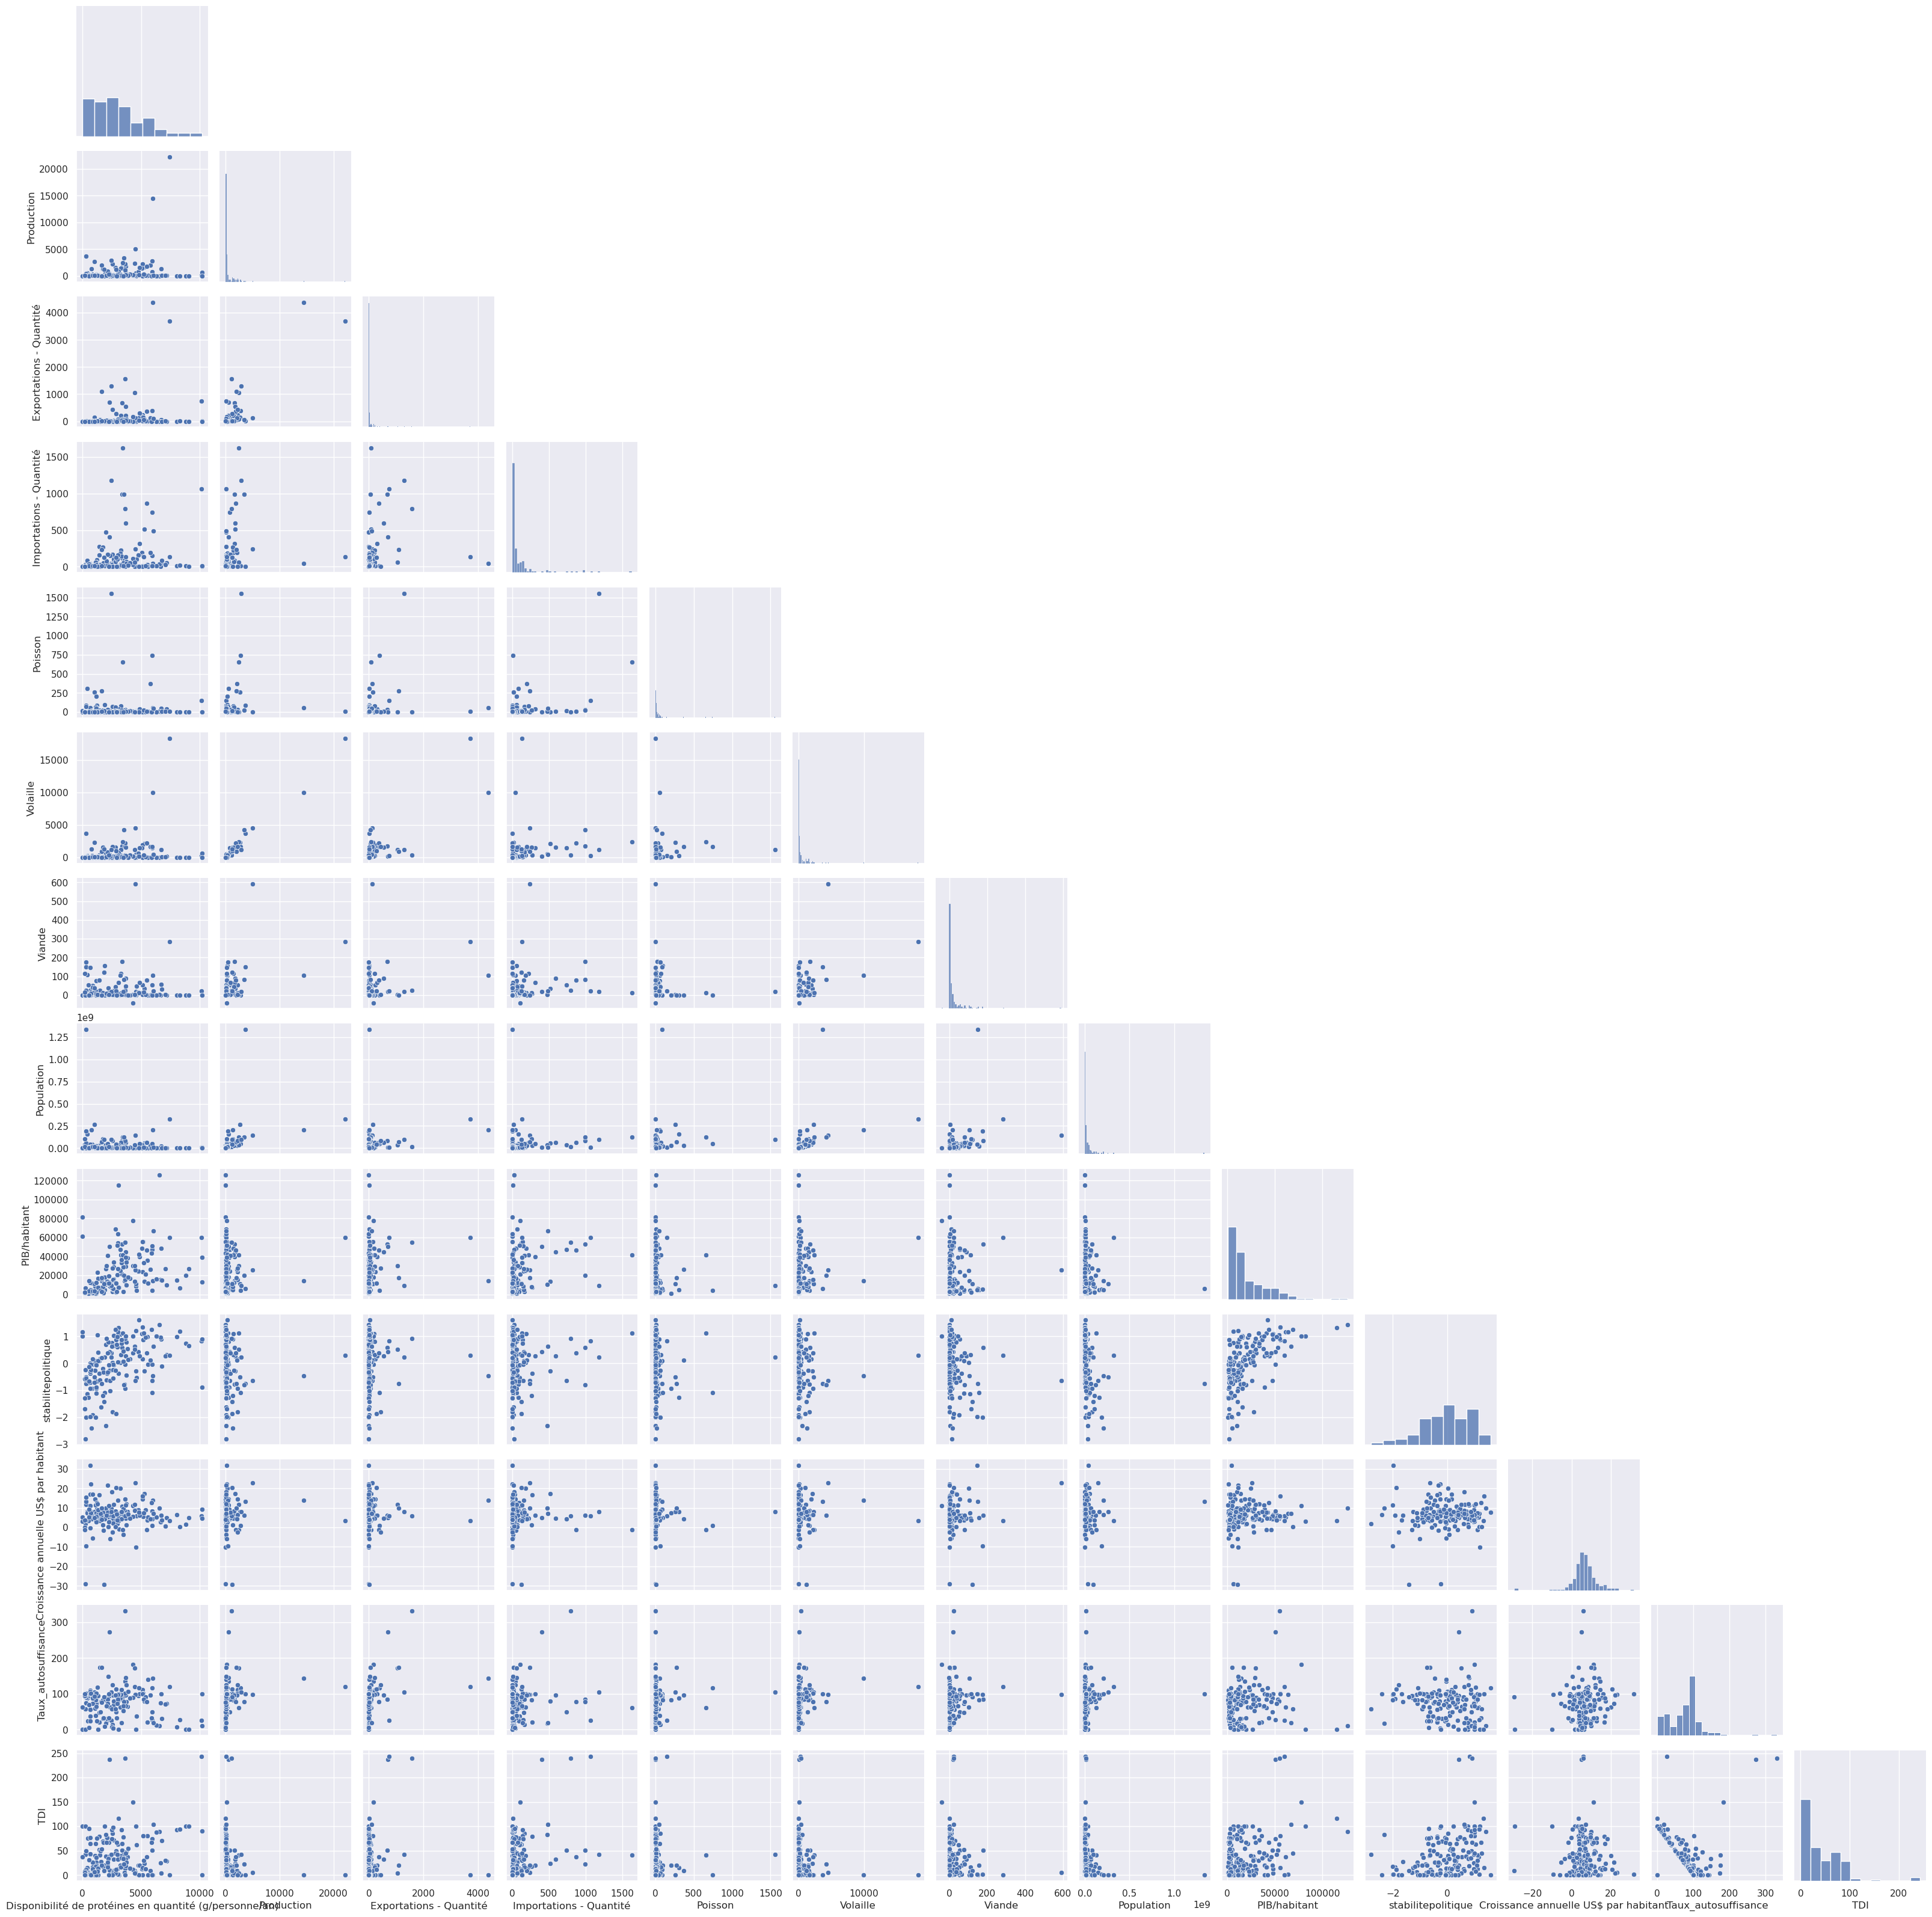

In [69]:
sns.pairplot(dispo_alim, corner=True)
plt.show()

Disponibilité alimentaire

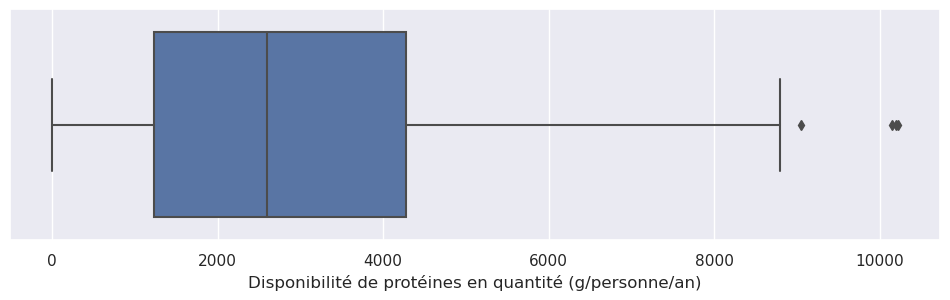

In [70]:
#Représentation la variable Disponibilité alimentaire sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["Disponibilité de protéines en quantité (g/personne/an)"], color="b")
plt.show()

In [71]:
DispoAlimentaire= dispo_alim["Disponibilité de protéines en quantité (g/personne/an)"]
DispoAlimentaire = sorted(DispoAlimentaire)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentaire,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

1232.7875
4277.799999999999
3045.0124999999994
-3334.7312499999994
8845.318749999999


In [72]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["Disponibilité de protéines en quantité (g/personne/an)"]>=8845.318749999999]

Zone  \
33          Chine - RAS de Hong-Kong   
71                            Israël   
129             Saint-Kitts-et-Nevis   
130  Saint-Vincent-et-les Grenadines   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
33                                            10150.65            115.0   
71                                            10201.75            629.0   
129                                            9052.00              0.0   
130                                           10220.00              1.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
33                     742.0                   1063.0    148.0     280.0   
71                       3.0                      2.0      1.0     636.0   
129                      0.0                      4.0      1.0       4.0   
130                      0.0                      9.0      1.0       8.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
33     22.0   7306322.0       59842.2                0.83   
71      0.0   8243848.0       39121.3               -0.89   
129     0.0     52045.0       26980.3                0.65   
130     0.0    109827.0       13102.1                0.89   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
33                               5.996463            26.376147  243.807339  
71                               9.349964           100.159236    0.318471  
129                              5.050186             0.000000  100.000000  
130                              4.499485            10.000000   90.000000

Population

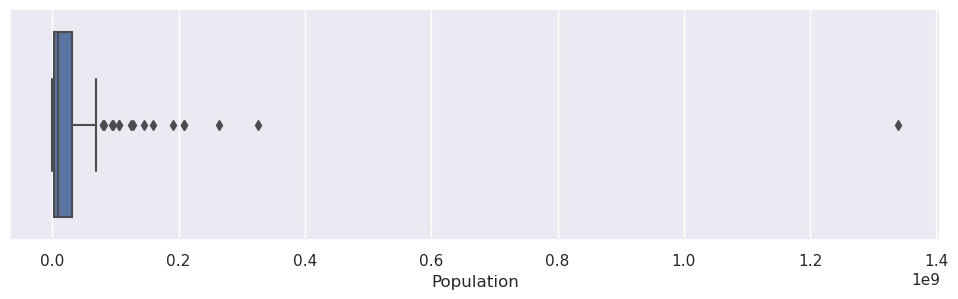

2513328.25
30782676.0
28269347.75
-39890693.375
73186697.625


In [73]:
#Représentation la variable population sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["Population"], color="b")
plt.show()
DispoAlimentairepop= dispo_alim["Population"]
DispoAlimentairepop = sorted(DispoAlimentairepop)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentairepop,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

In [74]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["Population"]>=73186697.625]

Zone  \
4                         Allemagne   
14                       Bangladesh   
23                           Brésil   
51             Fédération de Russie   
65                             Inde   
66                        Indonésie   
67   Iran (République islamique d')   
74                            Japon   
97                          Mexique   
105                         Nigéria   
112                        Pakistan   
116                     Philippines   
153                         Turquie   
157                        Viet Nam   
160                          Égypte   
163           États-Unis d'Amérique   
164                        Éthiopie   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
4                                              3398.15           1624.0   
14                                              397.85            491.0   
23                                             6004.25          14482.0   
51                                             4485.85           5023.0   
65                                              299.30           3640.0   
66                                              992.80           2688.0   
67                                             3642.70           2228.0   
74                                             3434.65           2396.0   
97                                             3525.90           3382.0   
105                                             317.55            438.0   
112                                             733.65           1302.0   
116                                            1741.05           1289.0   
153                                            2555.00           2194.0   
157                                            2445.50           2899.0   
160                                            1854.20           1233.0   
163                                            7424.10          22201.0   
164                                             197.10            130.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
4                      683.0                    988.0     30.0    1739.0   
14                      16.0                     83.0    310.0     250.0   
23                    4379.0                     43.0     59.0    9982.0   
51                     116.0                    241.0      0.0    4556.0   
65                      14.0                      3.0     89.0    3661.0   
66                     146.0                     19.0    259.0    2323.0   
67                      51.0                      6.0     33.0    2220.0   
74                      78.0                   1625.0    657.0    2415.0   
97                      61.0                    989.0     22.0    4219.0   
105                      0.0                      7.0     69.0     202.0   
112                      4.0                      2.0     20.0    1282.0   
116                      6.0                    265.0     27.0    1521.0   
153                    430.0                      3.0      0.0    1674.0   
157                   1298.0                   1181.0   1556.0    1206.0   
160                      6.0                    123.0     14.0    1250.0   
163                   3700.0                    134.0      6.0   18266.0   
164                      0.0                      1.0      0.0      14.0   

     Viande    Population  PIB/habitant  stabilitepolitique  \
4     178.0  8.265841e+07       53071.5                0.59   
14      0.0  1.596854e+08        4894.6               -1.26   
23    106.0  2.078338e+08       14524.6               -0.47   
51    591.0  1.455301e+08       25926.4               -0.64   
65    150.0  1.338677e+09        6182.9               -0.76   
66      3.0  2.646510e+08       10935.6               -0.50   
67     13.0  8.067388e+07       15883.4               -0.93   
74     13.0  1.275027e+08       41444.2                1.11   
97     81.0  1.247773e+08       19721.3  

Production

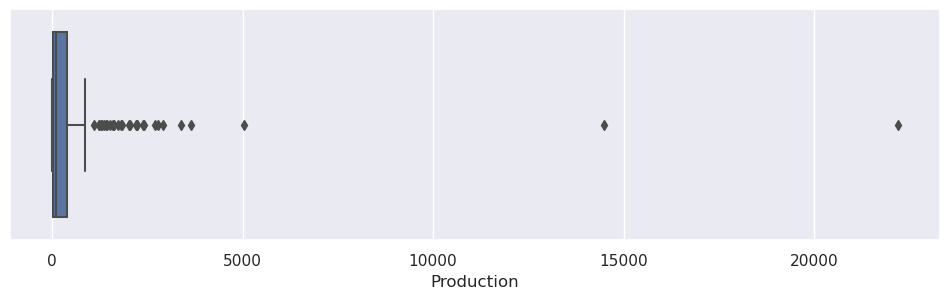

In [75]:
#Représentation la variable production sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["Production"], color="b")
plt.show()

In [76]:
DispoAlimentaireProd= dispo_alim["Production"]
DispoAlimentaireProd = sorted(DispoAlimentaireProd)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentaireProd,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

25.25
393.75
368.5
-527.5
946.5


In [77]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["Production"]>=946.5]

Zone  \
1                                       Afrique du Sud   
4                                            Allemagne   
8                                            Argentine   
10                                           Australie   
23                                              Brésil   
31                                              Canada   
36                                            Colombie   
45                                             Espagne   
50                                              France   
51                                Fédération de Russie   
65                                                Inde   
66                                           Indonésie   
67                      Iran (République islamique d')   
72                                              Italie   
74                                               Japon   
89                                            Malaisie   
97                                             Mexique   
101                                            Myanmar   
112                                           Pakistan   
115                                           Pays-Bas   
116                                        Philippines   
117                                            Pologne   
119                                              Pérou   
121  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
147                                          Thaïlande   
153                                            Turquie   
154                                            Ukraine   
157                                           Viet Nam   
160                                             Égypte   
163                              États-Unis d'Amérique   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
1                                              5281.55           1715.0   
4                                              3398.15           1624.0   
8                                              5124.60           2235.0   
10                                             6705.05           1349.0   
23                                             6004.25          14482.0   
31                                             5077.15           1440.0   
36                                             3577.00           1591.0   
45                                             4891.00           1597.0   
50                                             3690.15           1800.0   
51                                             4485.85           5023.0   
65                                              299.30           3640.0   
66                                              992.80           2688.0   
67                                             3642.70           2228.0   
72                                             3299.60           1398.0   
74                                             3434.65           2396.0   
89                                             5774.30           2046.0   
97                                             3525.90           3382.0   
101                                            5945.85           2789.0   
112                                             733.65           1302.0   
115                                            3657.30           1101.0   
116                                            1741.05           1289.0   
117                                            4449.35           2382.0   
119                                            2792.25           1517.0   
121                                            5464.05           1823.0   
147                                            1616.95           2010.0   
153                                            2555.00           2194.0   
154                                            2876.20           1235.0   
157                                            2445.50           2899.0   
160                                            1854.20           1233.0   
1

PIB/habitant

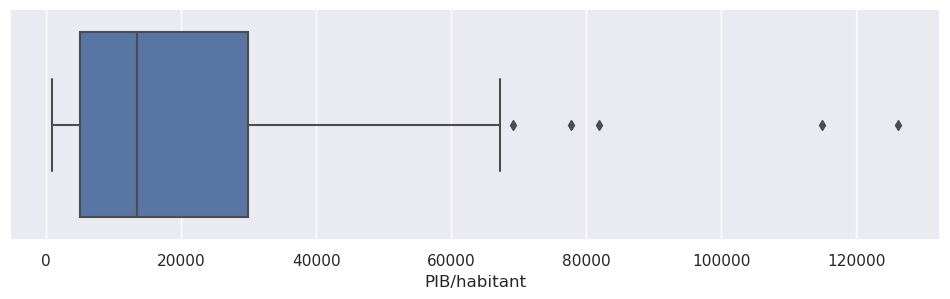

In [78]:
#Représentation la variablePIB/habitant sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["PIB/habitant"], color="b")
plt.show()

In [79]:
DispoAlimentairePIB= dispo_alim["PIB/habitant"]
DispoAlimentairePIB = sorted(DispoAlimentairePIB)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentairePIB,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

5057.8
29921.475
24863.675
-32237.712499999998
67216.98749999999


In [80]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["PIB/habitant"]>=67216.98749999999]

Zone  \
18               Bermudes   
34   Chine - RAS de Macao   
69                Irlande   
86             Luxembourg   
140                Suisse   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
18                                                0.00              0.0   
34                                             6559.05              4.0   
69                                             4277.80            137.0   
86                                             3066.00              0.0   
140                                            2810.50             94.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
18                       0.0                      2.0      2.0       0.0   
34                       0.0                     32.0      9.0      19.0   
69                     174.0                    112.0      0.0     128.0   
86                       2.0                     14.0      1.0      11.0   
140                      4.0                     72.0     13.0     133.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
18      0.0     63049.0       81835.0                1.00   
34      1.0    622585.0      126144.0                1.43   
69    -41.0   4753279.0       77749.2                1.00   
86      1.0    591910.0      114986.0                1.33   
140    11.0   8455804.0       69103.6                1.26   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
18                               3.174510             0.000000  100.000000  
34                               9.825741            11.111111   88.888889  
69                              11.220655           182.666667  149.333333  
86                               3.397501             0.000000  116.666667  
140                              0.332161            58.024691   44.444444

Exportation

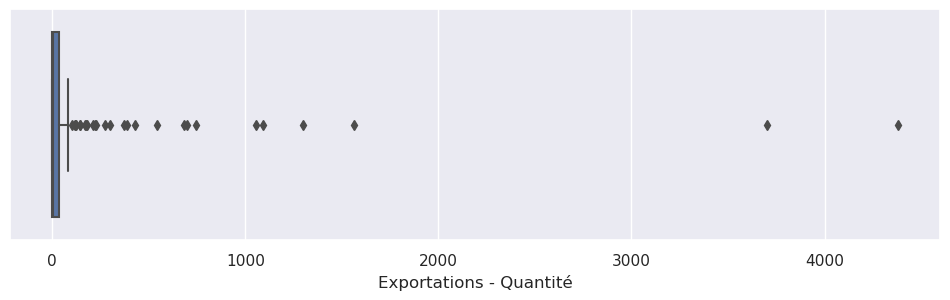

In [81]:
#Représentation la variablePIB/habitant sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["Exportations - Quantité"], color="b")
plt.show()

In [82]:
DispoAlimentaireexport= dispo_alim["Exportations - Quantité"]
DispoAlimentaireexport = sorted(DispoAlimentaireexport)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentaireexport,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

0.0
35.5
35.5
-53.25
88.75


In [83]:
#Recherche des outliers superieurs
dispo_alim.loc[dispo_alim["Exportations - Quantité"]>=88.75]

Zone  \
4                                            Allemagne   
8                                            Argentine   
16                                            Belgique   
23                                              Brésil   
26                                             Bélarus   
31                                              Canada   
32                                               Chili   
33                            Chine - RAS de Hong-Kong   
41                                            Danemark   
45                                             Espagne   
50                                              France   
51                                Fédération de Russie   
64                                             Hongrie   
66                                           Indonésie   
69                                             Irlande   
72                                              Italie   
89                                            Malaisie   
101                                            Myanmar   
115                                           Pays-Bas   
117                                            Pologne   
121  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
147                                          Thaïlande   
153                                            Turquie   
154                                            Ukraine   
157                                           Viet Nam   
161                                Émirats arabes unis   
163                              États-Unis d'Amérique   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
4                                              3398.15           1624.0   
8                                              5124.60           2235.0   
16                                             2306.80            465.0   
23                                             6004.25          14482.0   
26                                             3646.35            465.0   
31                                             5077.15           1440.0   
32                                             4737.70            734.0   
33                                            10150.65            115.0   
41                                             5168.40            179.0   
45                                             4891.00           1597.0   
50                                             3690.15           1800.0   
51                                             4485.85           5023.0   
64                                             3679.20            499.0   
66                                              992.80           2688.0   
69                                             4277.80            137.0   
72                                             3299.60           1398.0   
89                                             5774.30           2046.0   
101                                            5945.85           2789.0   
115                                            3657.30           1101.0   
117                                            4449.35           2382.0   
121                                            5464.05           1823.0   
147                                            1616.95           2010.0   
153                                            2555.00           2194.0   
154                                            2876.20           1235.0   
157                                            2445.50           2899.0   
161                                            6055.35             86.0   
163                                            7424.10          22201.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
4                      683.0                    988.0     30.0    1739.0   
8                      226.0                      9.0      0.0    1962.0   
16                     698.0                    403.0      4.0     152.0   
23                  

Importation

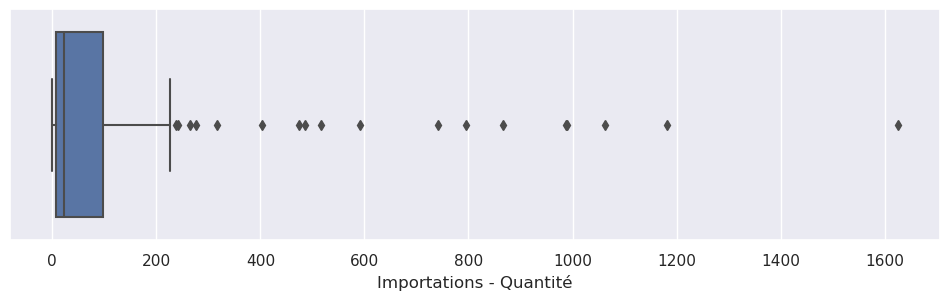

In [84]:
#Représentation la variablePIB/habitant sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["Importations - Quantité"], color="b")
plt.show()

In [85]:
DispoAlimentaireimport= dispo_alim["Importations - Quantité"]
DispoAlimentaireimport = sorted(DispoAlimentaireimport)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentaireimport,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

6.25
97.5
91.25
-130.625
234.375


In [86]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["Importations - Quantité"]>=234.375]

Zone  \
1                                       Afrique du Sud   
4                                            Allemagne   
5                                               Angola   
7                                      Arabie saoudite   
16                                            Belgique   
33                            Chine - RAS de Hong-Kong   
45                                             Espagne   
50                                              France   
51                                Fédération de Russie   
68                                                Iraq   
74                                               Japon   
97                                             Mexique   
115                                           Pays-Bas   
116                                        Philippines   
121  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
147                                          Thaïlande   
157                                           Viet Nam   
161                                Émirats arabes unis   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
1                                              5281.55           1715.0   
4                                              3398.15           1624.0   
5                                              1449.05             73.0   
7                                              5938.55            723.0   
16                                             2306.80            465.0   
33                                            10150.65            115.0   
45                                             4891.00           1597.0   
50                                             3690.15           1800.0   
51                                             4485.85           5023.0   
68                                             2011.15            100.0   
74                                             3434.65           2396.0   
97                                             3525.90           3382.0   
115                                            3657.30           1101.0   
116                                            1741.05           1289.0   
121                                            5464.05           1823.0   
147                                            1616.95           2010.0   
157                                            2445.50           2899.0   
161                                            6055.35             86.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
1                       74.0                    516.0      4.0    2118.0   
4                      683.0                    988.0     30.0    1739.0   
5                        0.0                    277.0     22.0     319.0   
7                       18.0                    742.0     13.0    1435.0   
16                     698.0                    403.0      4.0     152.0   
33                     742.0                   1063.0    148.0     280.0   
45                     301.0                    316.0     39.0    1497.0   
50                     540.0                    592.0      8.0    1573.0   
51                     116.0                    241.0      0.0    4556.0   
68                       0.0                    474.0      5.0     566.0   
74                      78.0                   1625.0    657.0    2415.0   
97                      61.0                    989.0     22.0    4219.0   
115                   1565.0                    796.0      0.0     372.0   
116                      6.0                    265.0     27.0    1521.0   
121                    371.0                    866.0      5.0    2234.0   
147                   1091.0                    237.0    274.0     881.0   
157                   1298.0                   1181.0   1556.0    1206.0   
161                    104.0                    485.0     51.0     412.0   

     Viande   Population  PIB/habitant  stabilitepolitique  \
1      36.0   

Taux autosuffisance

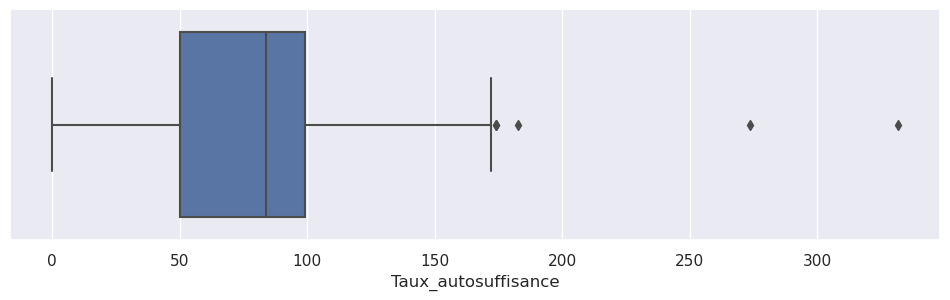

In [87]:
#Représentation la variable Taux_autosuffisance sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["Taux_autosuffisance"], color="b")
plt.show()

In [88]:
DispoAlimentaireautosuff= dispo_alim["Taux_autosuffisance"]
DispoAlimentaireautosuff = sorted(DispoAlimentaireautosuff)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentaireautosuff,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

50.0
99.2038057611785
49.2038057611785
-23.80570864176775
173.00951440294625


In [89]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["Taux_autosuffisance"]>=173.00951440294625]

Zone  Disponibilité de protéines en quantité (g/personne/an)  \
16     Belgique                                            2306.80        
69      Irlande                                            4277.80        
96   Mauritanie                                            1489.20        
115    Pays-Bas                                            3657.30        
147   Thaïlande                                            1616.95        

     Production  Exportations - Quantité  Importations - Quantité  Poisson  \
16        465.0                    698.0                    403.0      4.0   
69        137.0                    174.0                    112.0      0.0   
96        101.0                     67.0                     24.0      3.0   
115      1101.0                   1565.0                    796.0      0.0   
147      2010.0                   1091.0                    237.0    274.0   

     Volaille  Viande  Population  PIB/habitant  stabilitepolitique  \
16      152.0    20.0  11419748.0       50442.3                0.43   
69      128.0   -41.0   4753279.0       77749.2                1.00   
96       22.0    26.0   4282570.0        5108.5               -0.63   
115     372.0    24.0  17021347.0       55088.6                0.92   
147     881.0     0.0  69209810.0       17423.0               -0.75   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
16                               5.052643           273.529412  237.058824  
69                              11.220655           182.666667  149.333333  
96                               3.510730           174.137931   41.379310  
115                              5.913522           331.626506  239.759036  
147                              9.946697           173.875433   20.501730

Taux dépendance aux importations

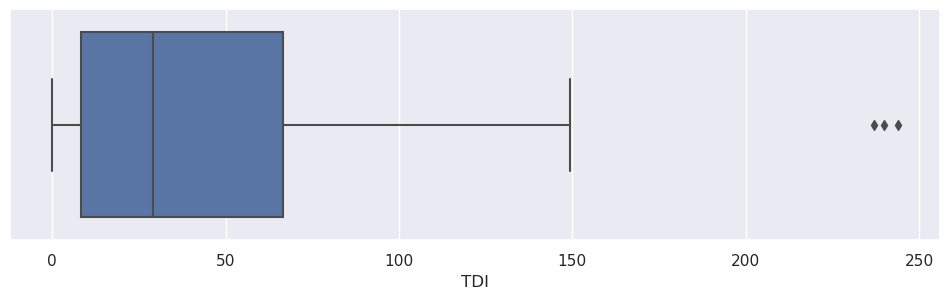

In [90]:
#Représentation la variable TDI sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["TDI"], color="b")
plt.show()

In [91]:
DispoAlimentairetdi= dispo_alim["TDI"]
DispoAlimentairetdi= sorted(DispoAlimentairetdi)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentairetdi,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

8.164414414414415
66.66666666666666
58.50225225225224
-79.58896396396395
154.42004504504501


In [92]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["TDI"]>=154.42004504504501]

Zone  \
16                   Belgique   
33   Chine - RAS de Hong-Kong   
115                  Pays-Bas   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
16                                             2306.80            465.0   
33                                            10150.65            115.0   
115                                            3657.30           1101.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
16                     698.0                    403.0      4.0     152.0   
33                     742.0                   1063.0    148.0     280.0   
115                   1565.0                    796.0      0.0     372.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
16     20.0  11419748.0       50442.3                0.43   
33     22.0   7306322.0       59842.2                0.83   
115    24.0  17021347.0       55088.6                0.92   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
16                               5.052643           273.529412  237.058824  
33                               5.996463            26.376147  243.807339  
115                              5.913522           331.626506  239.759036

Croissance annuelle US$ par habitant

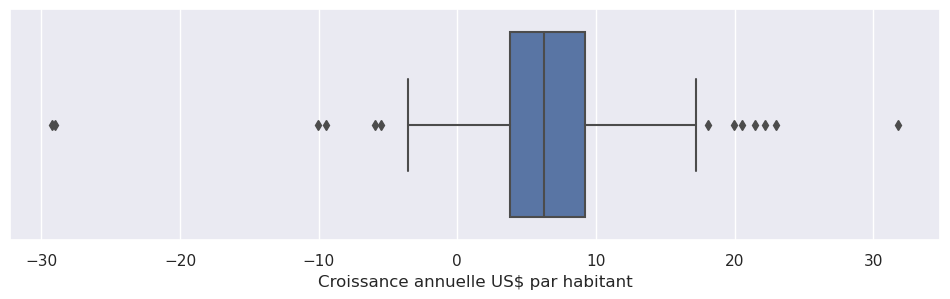

3.833087
9.244591999999999
5.411504999999999
-4.284170499999999
17.361849499999998


In [93]:
#Représentation la variable  sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["Croissance annuelle US$ par habitant"], color="b")
plt.show()
Croissance= dispo_alim["Croissance annuelle US$ par habitant"]
Croissance= sorted(Croissance)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(Croissance,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

In [94]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["Croissance annuelle US$ par habitant"]<=-3.7932479999999997]

Zone  Disponibilité de protéines en quantité (g/personne/an)  \
43      Dominique                                            4558.85        
105       Nigéria                                             317.55        
111   Ouzbékistan                                             251.85        
135  Sierra Leone                                             872.35        
151       Tunisie                                            2361.55        
160        Égypte                                            1854.20        

     Production  Exportations - Quantité  Importations - Quantité  Poisson  \
43          0.0                      0.0                      4.0      0.0   
105       438.0                      0.0                      7.0     69.0   
111         0.0                      0.0                      1.0      1.0   
135        39.0                      0.0                     14.0     11.0   
151       220.0                      4.0                      0.0      4.0   
160      1233.0                      6.0                    123.0     14.0   

     Volaille  Viande   Population  PIB/habitant  stabilitepolitique  \
43        4.0     0.0      71458.0       11341.3                1.20   
105     202.0   174.0  190873244.0        5190.4               -2.00   
111       0.0     0.0   31959785.0        6840.7               -0.24   
135      30.0    11.0    7488423.0        1633.7               -0.04   
151     195.0     3.0   11433443.0       11234.5               -1.02   
160    1250.0   121.0   96442591.0       11014.5               -1.42   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
43                             -10.057712             0.000000  100.000000  
105                             -9.460475            98.426966    1.573034  
111                            -29.038537             0.000000  100.000000  
135                             -5.517109            73.584906   26.415094  
151                             -5.963743           101.851852    0.000000  
160                            -29.218427            91.333333    9.111111

In [95]:
#Recherche des outliers sup
dispo_alim.loc[dispo_alim["Croissance annuelle US$ par habitant"]>=16.450392]

Zone  \
1           Afrique du Sud   
5                   Angola   
51    Fédération de Russie   
58                  Guinée   
76              Kazakhstan   
90                  Malawi   
102                Namibie   
125  République de Moldova   
138                 Soudan   
154                Ukraine   
158                 Zambie   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
1                                              5281.55           1715.0   
5                                              1449.05             73.0   
51                                             4485.85           5023.0   
58                                              631.45             22.0   
76                                             3204.70            295.0   
90                                              682.55            130.0   
102                                            2518.50             24.0   
125                                            2146.20             55.0   
138                                             657.00            215.0   
154                                            2876.20           1235.0   
158                                             850.45             89.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
1                       74.0                    516.0      4.0    2118.0   
5                        0.0                    277.0     22.0     319.0   
51                     116.0                    241.0      0.0    4556.0   
58                       1.0                     37.0      2.0      50.0   
76                       7.0                    187.0      9.0     331.0   
90                       0.0                      6.0      6.0      98.0   
102                     13.0                     31.0      1.0      28.0   
125                      0.0                     20.0      4.0      66.0   
138                      1.0                      3.0      2.0      69.0   
154                    274.0                    128.0      8.0    1009.0   
158                      1.0                     13.0      1.0      60.0   

     Viande   Population  PIB/habitant  stabilitepolitique  \
1      36.0   57009756.0       13860.3               -0.28   
5      10.0   29816766.0        7310.9               -0.38   
51    591.0  145530082.0       25926.4               -0.64   
58      6.0   12067519.0        2417.8               -0.70   
76    104.0   18080019.0       24863.0                0.03   
90      0.0   17670196.0        1472.1               -0.25   
102    12.0    2402633.0       10171.4                0.63   
125     1.0    4059684.0       11651.3               -0.32   
138   146.0   40813397.0        4598.9               -1.98   
154    22.0   44487709.0       11860.6               -1.87   
158    40.0   16853599.0        3485.0                0.15   

     Croissance annuelle US$ par habitant  Taux_autosuffisance        TDI  
1                               17.248840            79.508577  23.922114  
5                               16.553486            20.857143  79.142857  
51                              23.002807            97.571873   4.681430  
58                              16.963677            37.931034  63.793103  
76                              19.941732            62.105263  39.368421  
90                              22.205564            95.588235   4.411765  
102                             18.103185            57.142857  73.809524  
125                             21.482113            73.333333  26.666667  
138                             31.774106            99.078341   1.382488  
154                             20.542020           113.406795  11.753903  
158                             16.886155            88.118812  12.871287

Stabilité politique

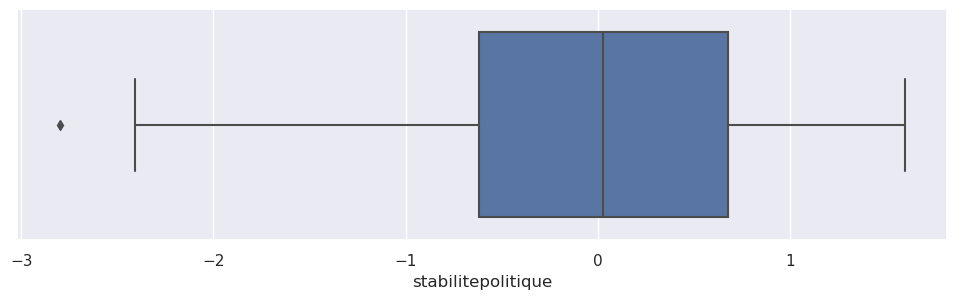

-0.6174999999999999
0.6799999999999999
1.2974999999999999
-2.5637499999999998
2.6262499999999998


In [96]:
#Représentation la variable stabilitepolitique sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=dispo_alim["stabilitepolitique"], color="b")
plt.show()
DispoAlimentairepolitic= dispo_alim["stabilitepolitique"]
DispoAlimentairepolitic= sorted(DispoAlimentairepolitic)
#Calcul du 1 er et 3 eme quartile
q1,q3= np.percentile(DispoAlimentairepolitic,[25,75])
print(q1)
print(q3)
#Calcul de l'écart interquartile
iqr = q3 - q1
print(iqr)
#Calcul du min
trait_inferieur = q1 -(1.5 * iqr)
print(trait_inferieur)
#Calcul du max
trait_superieur = q3 +(1.5 * iqr)
print(trait_superieur)

In [97]:
#Recherche des outliers inferieurs
dispo_alim.loc[dispo_alim["stabilitepolitique"]<=-0.6174999999999999]

Zone  \
0                       Afghanistan   
3                           Algérie   
7                   Arabie saoudite   
9                           Arménie   
12                      Azerbaïdjan   
14                       Bangladesh   
25                     Burkina Faso   
30                         Cameroun   
36                         Colombie   
40                    Côte d'Ivoire   
42                         Djibouti   
51             Fédération de Russie   
57                        Guatemala   
58                           Guinée   
62                            Haïti   
65                             Inde   
67   Iran (République islamique d')   
68                             Iraq   
71                           Israël   
77                            Kenya   
83                            Liban   
92                             Mali   
96                       Mauritanie   
97                          Mexique   
100                      Mozambique   
101                         Myanmar   
104                           Niger   
105                         Nigéria   
112                        Pakistan   
116                     Philippines   
123       République centrafricaine   
138                          Soudan   
144                     Tadjikistan   
145                           Tchad   
147                       Thaïlande   
149                            Togo   
151                         Tunisie   
153                         Turquie   
154                         Ukraine   
159                        Zimbabwe   
160                          Égypte   
164                        Éthiopie   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
3                                               806.65            303.0   
7                                              5938.55            723.0   
9                                              2018.45             11.0   
12                                             1642.50            104.0   
14                                              397.85            491.0   
25                                              631.45             55.0   
30                                             1160.70            157.0   
36                                             3577.00           1591.0   
40                                             1894.35            260.0   
42                                              463.55              1.0   
51                                             4485.85           5023.0   
57                                             2354.25            237.0   
58                                              631.45             22.0   
62                                             1230.05             29.0   
65                                              299.30           3640.0   
67                                             3642.70           2228.0   
68                                             2011.15            100.0   
71                                            10201.75            629.0   
77                                              408.80            149.0   
83                                             1587.75             64.0   
92                                              876.00            100.0   
96                                             1489.20            101.0   
97                                             3525.90           3382.0   
100                                            1175.30            268.0   
101                                            5945.85           2789.0   
104                                             521.95             73.0   
105                                             317.55            438.0   
112                                             733.65           1302.0   
116                                            1741.05           1289.0   
123                         

# Nettoyage des outliers

Population

In [98]:
dispo_alim.loc[(dispo_alim["Population"]>=73186697.625)&(dispo_alim["TDI"]<=8.164414414414415)&(dispo_alim["Taux_autosuffisance"]>=99.2038057611785)]

Zone  \
23                           Brésil   
65                             Inde   
66                        Indonésie   
67   Iran (République islamique d')   
112                        Pakistan   
153                         Turquie   
163           États-Unis d'Amérique   
164                        Éthiopie   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
23                                             6004.25          14482.0   
65                                              299.30           3640.0   
66                                              992.80           2688.0   
67                                             3642.70           2228.0   
112                                             733.65           1302.0   
153                                            2555.00           2194.0   
163                                            7424.10          22201.0   
164                                             197.10            130.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
23                    4379.0                     43.0     59.0    9982.0   
65                      14.0                      3.0     89.0    3661.0   
66                     146.0                     19.0    259.0    2323.0   
67                      51.0                      6.0     33.0    2220.0   
112                      4.0                      2.0     20.0    1282.0   
153                    430.0                      3.0      0.0    1674.0   
163                   3700.0                    134.0      6.0   18266.0   
164                      0.0                      1.0      0.0      14.0   

     Viande    Population  PIB/habitant  stabilitepolitique  \
23    106.0  2.078338e+08       14524.6               -0.47   
65    150.0  1.338677e+09        6182.9               -0.76   
66      3.0  2.646510e+08       10935.6               -0.50   
67     13.0  8.067388e+07       15883.4               -0.93   
112    18.0  2.079062e+08        5091.1               -2.41   
153     1.0  8.111645e+07       27913.8               -1.79   
163   284.0  3.250848e+08       59914.8                0.29   
164   116.0  1.063999e+08        2021.6               -1.68   

     Croissance annuelle US$ par habitant  Taux_autosuffisance       TDI  
23                              14.007823           142.736054  0.423812  
65                              13.253577           100.303114  0.082667  
66                               7.894929           104.959000  0.741898  
67                               6.539805           102.061383  0.274851  
112                              6.510190           100.153846  0.153846  
153                             -2.517628           124.165252  0.169779  
163                              3.368776           119.136034  0.719077  
164                              3.569094            99.236641  0.763359

In [99]:
#On retire les outliers
outlier=dispo_alim[~((dispo_alim["Population"]>=73186697.625)&(dispo_alim["TDI"]<=8.164414414414415)&(dispo_alim["Taux_autosuffisance"]>=99.2038057611785))]
outlier

Zone  \
0            Afghanistan   
1         Afrique du Sud   
2                Albanie   
3                Algérie   
4              Allemagne   
..                   ...   
159             Zimbabwe   
160               Égypte   
161  Émirats arabes unis   
162             Équateur   
165         Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
159                                            1036.60            106.0   
160                                            1854.20           1233.0   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
159                      0.0                      7.0      1.0      76.0   
160                      6.0                    123.0     14.0    1250.0   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
165                      4.0                      7.0      7.0       3.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
0      12.0  36296113.0        2058.4               -2.80   
1      36.0  57009756.0       13860.3               -0.28   
2       0.0   2884169.0       12771.0                0.38   
3      15.0  41389189.0       11737.4               -0.92   
4     178.0  82658409.0       53071.5                0.59   
..      ...         ...           ...                 ...   
159    37.0  14236595.0        3795.6               -0.71   
160   121.0  96442591.0       11014.5               -1.42   
161    22.0   9487203.0       67183.6                0.62   
162     1.0  16785361.0       11617.9               -0.07   
165     0.0    636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
0                                1.902494            57.971014   42.028986  
1                               17.248840            79.508577   23.922114  
2                                9.831056            25.925926   74.074074  
3                                4.228057            99.344262    0.655738  
4                                6.063881            84.188699   51.218248  
..                                    ...                  ...         ...  
159                              5.090939            93.805310    6.194690  
160                            -29.218427            91.333333    9.111111  
161                              7.117389            18.415418  103.854390  
162                              2.752312           100.000000    0.000000  
165                              3.975072            76.923077   53.846154  

[158 rows x 14 columns]

Importations

In [100]:
outlier.loc[((outlier["Importations - Quantité"]>=234.375)& (dispo_alim["TDI"]<=8.164414414414415)&(dispo_alim["Taux_autosuffisance"]>=99.2038057611785))]

Empty DataFrame
Columns: [Zone, Disponibilité de protéines en quantité (g/personne/an), Production, Exportations - Quantité, Importations - Quantité, Poisson, Volaille, Viande, Population, PIB/habitant, stabilitepolitique, Croissance annuelle US$ par habitant, Taux_autosuffisance, TDI]
Index: []

In [101]:

outlier1=outlier[~((outlier["Importations - Quantité"]>=234.375)& (outlier["TDI"]<=8.164414414414415)&(outlier["Taux_autosuffisance"]>=99.2038057611785))]
outlier1

Zone  \
0            Afghanistan   
1         Afrique du Sud   
2                Albanie   
3                Algérie   
4              Allemagne   
..                   ...   
159             Zimbabwe   
160               Égypte   
161  Émirats arabes unis   
162             Équateur   
165         Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
159                                            1036.60            106.0   
160                                            1854.20           1233.0   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
159                      0.0                      7.0      1.0      76.0   
160                      6.0                    123.0     14.0    1250.0   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
165                      4.0                      7.0      7.0       3.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
0      12.0  36296113.0        2058.4               -2.80   
1      36.0  57009756.0       13860.3               -0.28   
2       0.0   2884169.0       12771.0                0.38   
3      15.0  41389189.0       11737.4               -0.92   
4     178.0  82658409.0       53071.5                0.59   
..      ...         ...           ...                 ...   
159    37.0  14236595.0        3795.6               -0.71   
160   121.0  96442591.0       11014.5               -1.42   
161    22.0   9487203.0       67183.6                0.62   
162     1.0  16785361.0       11617.9               -0.07   
165     0.0    636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
0                                1.902494            57.971014   42.028986  
1                               17.248840            79.508577   23.922114  
2                                9.831056            25.925926   74.074074  
3                                4.228057            99.344262    0.655738  
4                                6.063881            84.188699   51.218248  
..                                    ...                  ...         ...  
159                              5.090939            93.805310    6.194690  
160                            -29.218427            91.333333    9.111111  
161                              7.117389            18.415418  103.854390  
162                              2.752312           100.000000    0.000000  
165                              3.975072            76.923077   53.846154  

[158 rows x 14 columns]

Exportation

In [102]:
outlier1.loc[((outlier1["Exportations - Quantité"]>=88.75) & (outlier["TDI"]<=8.164414414414415)&(outlier["Taux_autosuffisance"]>=99.2038057611785))]

Zone  Disponibilité de protéines en quantité (g/personne/an)  \
8    Argentine                                            5124.60        
101    Myanmar                                            5945.85        
117    Pologne                                            4449.35        

     Production  Exportations - Quantité  Importations - Quantité  Poisson  \
8        2235.0                    226.0                      9.0      0.0   
101      2789.0                    388.0                      9.0    744.0   
117      2382.0                   1054.0                     57.0      0.0   

     Volaille  Viande  Population  PIB/habitant  stabilitepolitique  \
8      1962.0    54.0  43937140.0       23597.1                0.17   
101    1666.0     0.0  53382523.0        4224.5               -1.08   
117    1156.0     4.0  37953180.0       30064.5                0.52   

     Croissance annuelle US$ par habitant  Taux_autosuffisance       TDI  
8                               14.429876           110.753221  0.445986  
101                              1.078025           115.726141  0.373444  
117                             11.617931           171.985560  4.115523

In [103]:
#On va enlever les outliers qui peuvent influer sur notre analyse
outlier2= outlier1[~((outlier1["Exportations - Quantité"]>=88.75) & (outlier1["TDI"]<=8.164414414414415)&(outlier1["Taux_autosuffisance"]>=99.2038057611785))]
outlier2

Zone  \
0            Afghanistan   
1         Afrique du Sud   
2                Albanie   
3                Algérie   
4              Allemagne   
..                   ...   
159             Zimbabwe   
160               Égypte   
161  Émirats arabes unis   
162             Équateur   
165         Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
159                                            1036.60            106.0   
160                                            1854.20           1233.0   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
159                      0.0                      7.0      1.0      76.0   
160                      6.0                    123.0     14.0    1250.0   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
165                      4.0                      7.0      7.0       3.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
0      12.0  36296113.0        2058.4               -2.80   
1      36.0  57009756.0       13860.3               -0.28   
2       0.0   2884169.0       12771.0                0.38   
3      15.0  41389189.0       11737.4               -0.92   
4     178.0  82658409.0       53071.5                0.59   
..      ...         ...           ...                 ...   
159    37.0  14236595.0        3795.6               -0.71   
160   121.0  96442591.0       11014.5               -1.42   
161    22.0   9487203.0       67183.6                0.62   
162     1.0  16785361.0       11617.9               -0.07   
165     0.0    636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
0                                1.902494            57.971014   42.028986  
1                               17.248840            79.508577   23.922114  
2                                9.831056            25.925926   74.074074  
3                                4.228057            99.344262    0.655738  
4                                6.063881            84.188699   51.218248  
..                                    ...                  ...         ...  
159                              5.090939            93.805310    6.194690  
160                            -29.218427            91.333333    9.111111  
161                              7.117389            18.415418  103.854390  
162                              2.752312           100.000000    0.000000  
165                              3.975072            76.923077   53.846154  

[155 rows x 14 columns]

PIB/habitant

In [104]:
outlier2.loc[((outlier2["PIB/habitant"]>=67216.98749999999) &  (outlier2["TDI"]<=8.164414414414415)&(outlier2["Taux_autosuffisance"]>=99.2038057611785))]

Empty DataFrame
Columns: [Zone, Disponibilité de protéines en quantité (g/personne/an), Production, Exportations - Quantité, Importations - Quantité, Poisson, Volaille, Viande, Population, PIB/habitant, stabilitepolitique, Croissance annuelle US$ par habitant, Taux_autosuffisance, TDI]
Index: []

In [105]:
outlier3=outlier2[~((outlier2["PIB/habitant"]>=67216.98749999999) &  (outlier2["TDI"]<=8.164414414414415)&(outlier2["Taux_autosuffisance"]>=99.2038057611785))]
outlier3

Zone  \
0            Afghanistan   
1         Afrique du Sud   
2                Albanie   
3                Algérie   
4              Allemagne   
..                   ...   
159             Zimbabwe   
160               Égypte   
161  Émirats arabes unis   
162             Équateur   
165         Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
159                                            1036.60            106.0   
160                                            1854.20           1233.0   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
159                      0.0                      7.0      1.0      76.0   
160                      6.0                    123.0     14.0    1250.0   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
165                      4.0                      7.0      7.0       3.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
0      12.0  36296113.0        2058.4               -2.80   
1      36.0  57009756.0       13860.3               -0.28   
2       0.0   2884169.0       12771.0                0.38   
3      15.0  41389189.0       11737.4               -0.92   
4     178.0  82658409.0       53071.5                0.59   
..      ...         ...           ...                 ...   
159    37.0  14236595.0        3795.6               -0.71   
160   121.0  96442591.0       11014.5               -1.42   
161    22.0   9487203.0       67183.6                0.62   
162     1.0  16785361.0       11617.9               -0.07   
165     0.0    636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
0                                1.902494            57.971014   42.028986  
1                               17.248840            79.508577   23.922114  
2                                9.831056            25.925926   74.074074  
3                                4.228057            99.344262    0.655738  
4                                6.063881            84.188699   51.218248  
..                                    ...                  ...         ...  
159                              5.090939            93.805310    6.194690  
160                            -29.218427            91.333333    9.111111  
161                              7.117389            18.415418  103.854390  
162                              2.752312           100.000000    0.000000  
165                              3.975072            76.923077   53.846154  

[155 rows x 14 columns]

Disponibilité de protéines en quantité (g/personne/an)

In [106]:
outlier3.loc[((outlier3["Disponibilité de protéines en quantité (g/personne/an)"]>=8845.318749999999) &  (outlier3["TDI"]<=8.164414414414415)&(outlier3["Taux_autosuffisance"]>=99.2038057611785))]

Zone  Disponibilité de protéines en quantité (g/personne/an)  \
71  Israël                                           10201.75        

    Production  Exportations - Quantité  Importations - Quantité  Poisson  \
71       629.0                      3.0                      2.0      1.0   

    Volaille  Viande  Population  PIB/habitant  stabilitepolitique  \
71     636.0     0.0   8243848.0       39121.3               -0.89   

    Croissance annuelle US$ par habitant  Taux_autosuffisance       TDI  
71                              9.349964           100.159236  0.318471

In [107]:
outlier4=outlier3[~((outlier3["Disponibilité de protéines en quantité (g/personne/an)"]>=8845.318749999999)  &  (outlier3["TDI"]<=8.164414414414415)&(outlier3["Taux_autosuffisance"]>=99.2038057611785))]
outlier4

Zone  \
0            Afghanistan   
1         Afrique du Sud   
2                Albanie   
3                Algérie   
4              Allemagne   
..                   ...   
159             Zimbabwe   
160               Égypte   
161  Émirats arabes unis   
162             Équateur   
165         Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
159                                            1036.60            106.0   
160                                            1854.20           1233.0   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
159                      0.0                      7.0      1.0      76.0   
160                      6.0                    123.0     14.0    1250.0   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
165                      4.0                      7.0      7.0       3.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
0      12.0  36296113.0        2058.4               -2.80   
1      36.0  57009756.0       13860.3               -0.28   
2       0.0   2884169.0       12771.0                0.38   
3      15.0  41389189.0       11737.4               -0.92   
4     178.0  82658409.0       53071.5                0.59   
..      ...         ...           ...                 ...   
159    37.0  14236595.0        3795.6               -0.71   
160   121.0  96442591.0       11014.5               -1.42   
161    22.0   9487203.0       67183.6                0.62   
162     1.0  16785361.0       11617.9               -0.07   
165     0.0    636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
0                                1.902494            57.971014   42.028986  
1                               17.248840            79.508577   23.922114  
2                                9.831056            25.925926   74.074074  
3                                4.228057            99.344262    0.655738  
4                                6.063881            84.188699   51.218248  
..                                    ...                  ...         ...  
159                              5.090939            93.805310    6.194690  
160                            -29.218427            91.333333    9.111111  
161                              7.117389            18.415418  103.854390  
162                              2.752312           100.000000    0.000000  
165                              3.975072            76.923077   53.846154  

[154 rows x 14 columns]

Production

In [108]:
outlier4.loc[((outlier4["Production"]>=946.5)&  (outlier4["TDI"]<=8.164414414414415)&(outlier4["Taux_autosuffisance"]>=99.2038057611785))]

Zone  Disponibilité de protéines en quantité (g/personne/an)  \
10  Australie                                            6705.05        

    Production  Exportations - Quantité  Importations - Quantité  Poisson  \
10      1349.0                     54.0                     55.0     51.0   

    Volaille  Viande  Population  PIB/habitant  stabilitepolitique  \
10    1171.0    56.0  24584620.0       48398.5                 0.9   

    Croissance annuelle US$ par habitant  Taux_autosuffisance       TDI  
10                              6.279892            99.925926  4.074074

In [109]:
outlier5=outlier4[~((outlier4["Production"]>=946.5) &  (outlier4["TDI"]<=8.164414414414415)&(outlier4["Taux_autosuffisance"]>=99.2038057611785))]
outlier5

Zone  \
0            Afghanistan   
1         Afrique du Sud   
2                Albanie   
3                Algérie   
4              Allemagne   
..                   ...   
159             Zimbabwe   
160               Égypte   
161  Émirats arabes unis   
162             Équateur   
165         Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
3                                               806.65            303.0   
4                                              3398.15           1624.0   
..                                                 ...              ...   
159                                            1036.60            106.0   
160                                            1854.20           1233.0   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
3                        0.0                      2.0     13.0     277.0   
4                      683.0                    988.0     30.0    1739.0   
..                       ...                      ...      ...       ...   
159                      0.0                      7.0      1.0      76.0   
160                      6.0                    123.0     14.0    1250.0   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
165                      4.0                      7.0      7.0       3.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
0      12.0  36296113.0        2058.4               -2.80   
1      36.0  57009756.0       13860.3               -0.28   
2       0.0   2884169.0       12771.0                0.38   
3      15.0  41389189.0       11737.4               -0.92   
4     178.0  82658409.0       53071.5                0.59   
..      ...         ...           ...                 ...   
159    37.0  14236595.0        3795.6               -0.71   
160   121.0  96442591.0       11014.5               -1.42   
161    22.0   9487203.0       67183.6                0.62   
162     1.0  16785361.0       11617.9               -0.07   
165     0.0    636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
0                                1.902494            57.971014   42.028986  
1                               17.248840            79.508577   23.922114  
2                                9.831056            25.925926   74.074074  
3                                4.228057            99.344262    0.655738  
4                                6.063881            84.188699   51.218248  
..                                    ...                  ...         ...  
159                              5.090939            93.805310    6.194690  
160                            -29.218427            91.333333    9.111111  
161                              7.117389            18.415418  103.854390  
162                              2.752312           100.000000    0.000000  
165                              3.975072            76.923077   53.846154  

[153 rows x 14 columns]

Stabilité politique

In [110]:
outlier5.loc[((outlier5["stabilitepolitique"]<=-0.6174999999999999)&   (outlier5["TDI"]<=8.164414414414415)&(outlier5["Taux_autosuffisance"]>=99.2038057611785))]

Zone  Disponibilité de protéines en quantité (g/personne/an)  \
3    Algérie                                             806.65        
151  Tunisie                                            2361.55        

     Production  Exportations - Quantité  Importations - Quantité  Poisson  \
3         303.0                      0.0                      2.0     13.0   
151       220.0                      4.0                      0.0      4.0   

     Volaille  Viande  Population  PIB/habitant  stabilitepolitique  \
3       277.0    15.0  41389189.0       11737.4               -0.92   
151     195.0     3.0  11433443.0       11234.5               -1.02   

     Croissance annuelle US$ par habitant  Taux_autosuffisance       TDI  
3                                4.228057            99.344262  0.655738  
151                             -5.963743           101.851852  0.000000

In [111]:
#On va enlever les outliers qui peuvent influer sur notre analyse telle que ceux de la stabilite politique 
dispo_alim= outlier5[~((outlier5["stabilitepolitique"]<=-0.6174999999999999)& (outlier5["TDI"]<=8.164414414414415)&(outlier5["Taux_autosuffisance"]>=99.2038057611785))]

# Analyse exploratoire

In [113]:
#Tout d'abord, faisons un rapide tour de nos données. Commençons par les afficher :
dispo_alim

Zone  \
0            Afghanistan   
1         Afrique du Sud   
2                Albanie   
4              Allemagne   
5                 Angola   
..                   ...   
159             Zimbabwe   
160               Égypte   
161  Émirats arabes unis   
162             Équateur   
165         Îles Salomon   

     Disponibilité de protéines en quantité (g/personne/an)  Production  \
0                                               248.20             40.0   
1                                              5281.55           1715.0   
2                                              2456.45             14.0   
4                                              3398.15           1624.0   
5                                              1449.05             73.0   
..                                                 ...              ...   
159                                            1036.60            106.0   
160                                            1854.20           1233.0   
161                                            6055.35             86.0   
162                                            2263.00            342.0   
165                                            1649.80             10.0   

     Exportations - Quantité  Importations - Quantité  Poisson  Volaille  \
0                        0.0                     29.0      0.0      57.0   
1                       74.0                    516.0      4.0    2118.0   
2                        0.0                     40.0      2.0      47.0   
4                      683.0                    988.0     30.0    1739.0   
5                        0.0                    277.0     22.0     319.0   
..                       ...                      ...      ...       ...   
159                      0.0                      7.0      1.0      76.0   
160                      6.0                    123.0     14.0    1250.0   
161                    104.0                    485.0     51.0     412.0   
162                      0.0                      0.0      1.0     341.0   
165                      4.0                      7.0      7.0       3.0   

     Viande  Population  PIB/habitant  stabilitepolitique  \
0      12.0  36296113.0        2058.4               -2.80   
1      36.0  57009756.0       13860.3               -0.28   
2       0.0   2884169.0       12771.0                0.38   
4     178.0  82658409.0       53071.5                0.59   
5      10.0  29816766.0        7310.9               -0.38   
..      ...         ...           ...                 ...   
159    37.0  14236595.0        3795.6               -0.71   
160   121.0  96442591.0       11014.5               -1.42   
161    22.0   9487203.0       67183.6                0.62   
162     1.0  16785361.0       11617.9               -0.07   
165     0.0    636039.0        2663.5                0.20   

     Croissance annuelle US$ par habitant  Taux_autosuffisance         TDI  
0                                1.902494            57.971014   42.028986  
1                               17.248840            79.508577   23.922114  
2                                9.831056            25.925926   74.074074  
4                                6.063881            84.188699   51.218248  
5                               16.553486            20.857143   79.142857  
..                                    ...                  ...         ...  
159                              5.090939            93.805310    6.194690  
160                            -29.218427            91.333333    9.111111  
161                              7.117389            18.415418  103.854390  
162                              2.752312           100.000000    0.000000  
165                              3.975072            76.923077   53.846154  

[151 rows x 14 columns]

In [114]:
#La méthode info nous donne des indications globales :
dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 165
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    151 non-null    object 
 1   Disponibilité de protéines en quantité (g/personne/an)  151 non-null    float64
 2   Production                                              151 non-null    float64
 3   Exportations - Quantité                                 151 non-null    float64
 4   Importations - Quantité                                 151 non-null    float64
 5   Poisson                                                 151 non-null    float64
 6   Volaille                                                151 non-null    float64
 7   Viande                                                  151 non-null    float64
 8   Population                              

In [115]:
#le % de valeurs manquantes par colonne 

dispo_alim.isna().mean()

Zone                                                      0.0
Disponibilité de protéines en quantité (g/personne/an)    0.0
Production                                                0.0
Exportations - Quantité                                   0.0
Importations - Quantité                                   0.0
Poisson                                                   0.0
Volaille                                                  0.0
Viande                                                    0.0
Population                                                0.0
PIB/habitant                                              0.0
stabilitepolitique                                        0.0
Croissance annuelle US$ par habitant                      0.0
Taux_autosuffisance                                       0.0
TDI                                                       0.0
dtype: float64

In [116]:
#Y a-t-il des lignes en double ?

dispo_alim.duplicated().sum()

0

In [117]:
#Combien y a-t-il de valeurs différentes par colonne ?

dispo_alim.nunique()

Zone                                                      151
Disponibilité de protéines en quantité (g/personne/an)    144
Production                                                115
Exportations - Quantité                                    55
Importations - Quantité                                    94
Poisson                                                    45
Volaille                                                  116
Viande                                                     50
Population                                                151
PIB/habitant                                              151
stabilitepolitique                                        116
Croissance annuelle US$ par habitant                      151
Taux_autosuffisance                                       135
TDI                                                       130
dtype: int64

In [118]:
#Création en fichier csv
chemin = "./dispo_alim.csv"
dispo_alim.to_csv(chemin)
dispo_alim = dispo_alim.set_index('Zone')